# Churn prediction using supervised machine learning

In [2]:
# Ignoring warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Library for dataframe and manipulation
import numpy as np
import pandas as pd

# Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libaries related to feature engineering
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA, TruncatedSVD
from imblearn.pipeline import Pipeline as ImbPipeline

# Model
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

# Model Evaluation and Parameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,  StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif

# Serialization library
import pickle


## PART I: EDA - Exploratory Data Analysis

Before diving into the intricacies of Exploratory Data Analysis (EDA), let’s first familiarize with the dataset columns that will be under scrutiny. Each column holds specific information about customers which, collectively, can be analyzed to predict patterns and tendencies including the likelihood of customer churn:


    - CustomerID: A unique identifier for each customer.
    - Churn: Whether the customer has left the company's service (1) or not (0).
    - Tenure: The length of time the customer has been with the company (in months).
    - PreferredLoginDevice: The device the customer prefers to use when logging into the service (e.g., Mobile Phone, Computer).
    - CityTier: A classification of the customer's city by certain criteria, such as size or economic activity (Tier 1, Tier 2, etc.).
    - WarehouseToHome: The distance from the warehouse to the customer’s home, possibly in kilometers or miles.
    - PreferredPaymentMode: The customer's preferred method of payment (e.g., Debit Card, UPI, Cash on Delivery).
    - Gender: The customer's gender (e.g., Female, Male).
    - HourSpendOnApp: The average number of hours the customer spends on the company's app.
    - NumberOfDeviceRegistered: The number of devices the customer has registered with the company's service.
    - PreferedOrderCat: The category of products that the customer prefers to order (e.g., Laptop & Accessory, Mobile).
    - SatisfactionScore: A rating of how satisfied the customer is with the company's service, on a scale (e.g., 1-5).
    - MaritalStatus: The marital status of the customer (e.g., Single, Divorced).
    - NumberOfAddress: The number of addresses registered with the company by the customer.
    - Complain: Whether the customer has made a complaint (1) or not (0).
    - OrderAmountHikeFromlastYear: The percentage increase in the customer's order amount compared to the previous year.
    - CouponUsed: The number of coupons used by the customer for purchasing.
    - OrderCount: The number of orders placed by the customer.
    - DaySinceLastOrder: The number of days since the customer's last order.
    - CashbackAmount: The amount of cashback received by the customer.
    
Exploratory Data Analysis (EDA) is crucial before building predictive models. It helps we understand the nature of data, uncover patterns, anomalies, or any relationships between variables. Here are some EDA questions we can consider when analyzing data to predict customer churn:

1.  General Understanding: Are there any missing values? How is the data distributed? What is the overall churn rate in the dataset? 
2. Churn Rate and Tenure: How does the churn rate vary with the tenure of the customers? Is there a particular tenure length where churn rate spikes or drops significantly?
3. Demographics and Churn: Are there any noticeable trends in churn when looking at the demographics of the customers, such as gender, marital status, or city tier?
4. Visualize the total number of customers who churned for each distribution of "HourSpendOnApp" and "NumberOfDeviceRegistered
5. Customer Satisfaction: How does customer satisfaction, as indicated by the satisfaction score, relate to churn? Are less satisfied customers more prone to leaving?
6. Complaints and Churn: Is there a correlation between the number of complaints a customer has made and their likelihood to churn?
7. Product Preferences: Do certain preferred product categories have higher churn rates? For example, are customers who prefer laptops and accessories more loyal than those who prefer mobile phones?
8. Distance Factor: Does the distance from the warehouse to a customer's home have any correlation with churn? Are customers who live farther away more likely to churn?
9. Payment Methods: Is there a preferred payment mode among customers who churn, and how does it compare with those who remain?
10. Financial Behavior: How do the order amount hike from the previous year, coupon usage, and the cashback amount received by customers relate to their likelihood of churning?
11. Service Utilization: Do customers with a higher number of addresses, which may indicate a higher complexity of service use, have different churn rates compared to those with fewer addresses?
12. Create a heatmap to visualize the correlations between numeric columns in the dataset

In [4]:
# Import dataset
raw_data = pd.read_csv('ecommerce.csv', sep=';')
raw_data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [5]:
# Make a raw_data copy
df = raw_data.copy()

1. General Understanding: Are there any missing values? If so, how will we handle them? How is the data distributed? What is the overall churn rate in the dataset? 

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [7]:
df.shape

(5630, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Visualize all categorized data together, making it easy to compare and get an overview of the data distribution.

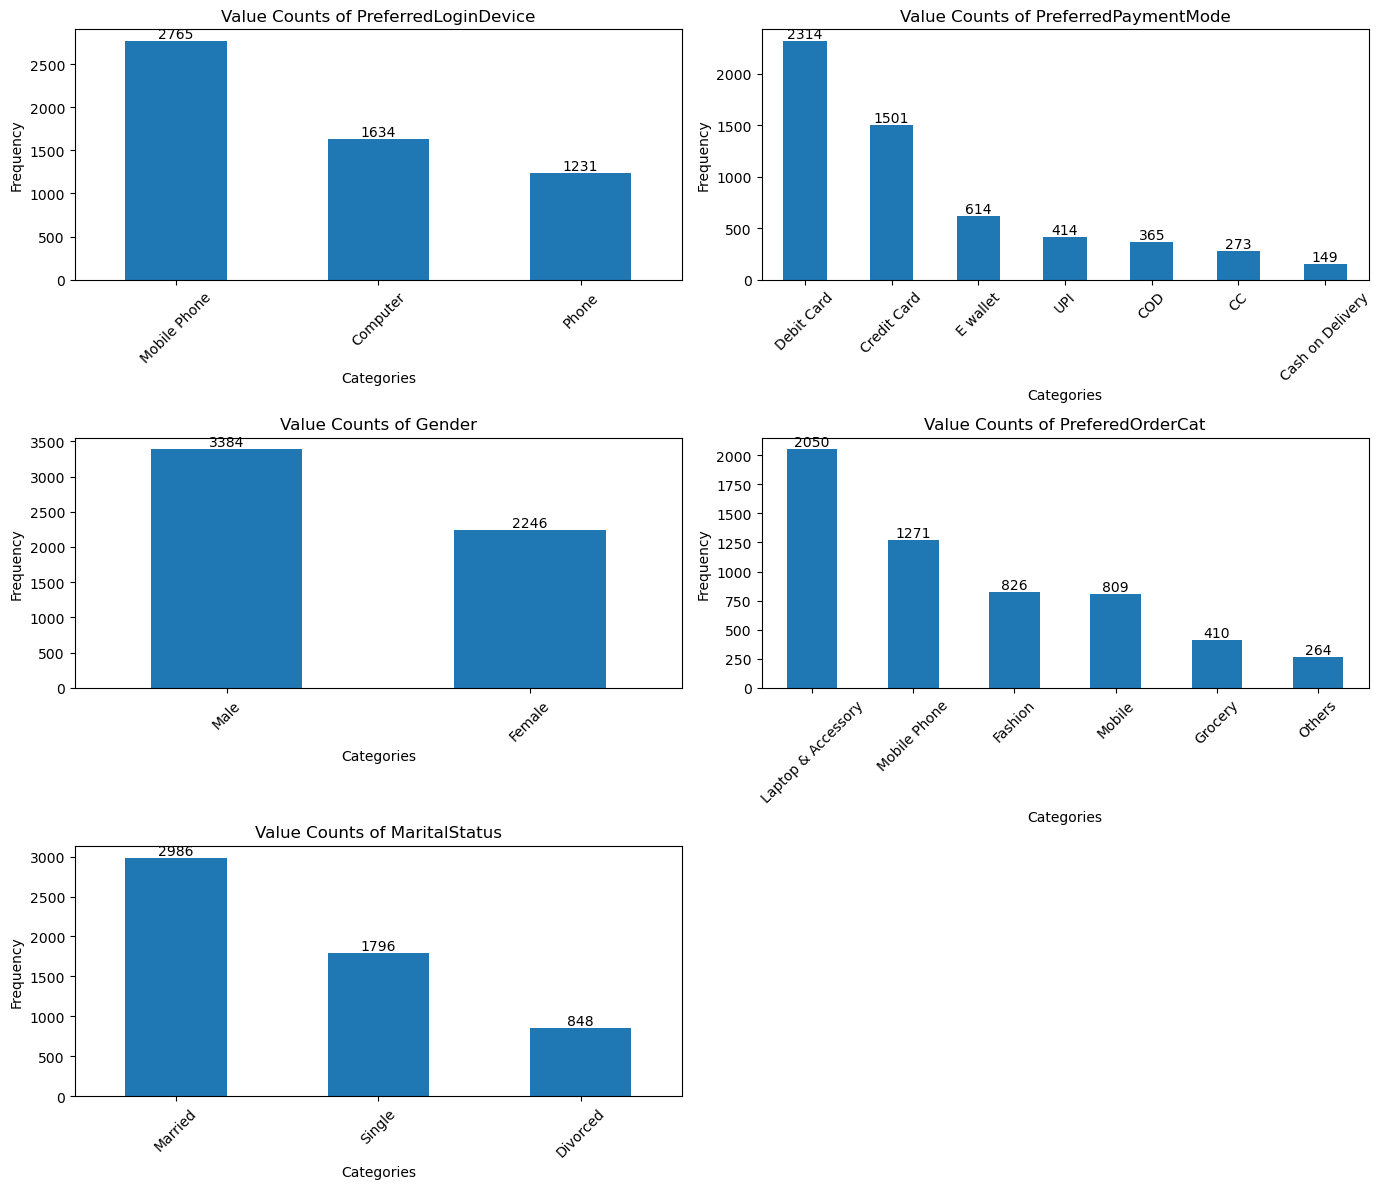

In [9]:
# We have 5 categorical variables, so we set up a grid that can accommodate this number
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12)) 
axes = axes.flatten() 

# Track the number of object type columns plotted
num_object_cols_plotted = 0

# Loop through the DataFrame columns and plot value counts for each categorical feature on a subplot
for column in df.columns:
    if df[column].dtypes == 'object': 
        value_counts = df[column].value_counts()
        ax = axes[num_object_cols_plotted]
        value_counts.plot(kind='bar', ax=ax)
        
        # Annotate the bar graph with the counts
        for index, value in enumerate(value_counts):
            ax.text(index, value, str(value), ha='center', va='bottom')
        
        ax.set_title(f'Value Counts of {column}')
        ax.set_xlabel('Categories')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45)
        
        num_object_cols_plotted += 1 

# If there are empty subplots, remove them
for i in range(num_object_cols_plotted, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout for better fit

In [10]:
# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)

In [11]:
# Check 0 values
(df ==0).sum()

CustomerID                        0
Churn                          4682
Tenure                          508
PreferredLoginDevice              0
CityTier                          0
WarehouseToHome                   0
PreferredPaymentMode              0
Gender                            0
HourSpendOnApp                    3
NumberOfDeviceRegistered          0
PreferedOrderCat                  0
SatisfactionScore                 0
MaritalStatus                     0
NumberOfAddress                   0
Complain                       4026
OrderAmountHikeFromlastYear       0
CouponUsed                     1030
OrderCount                        0
DaySinceLastOrder               496
CashbackAmount                    4
dtype: int64

- The presence of zero values in the dataset can be considered valid and makes sense in the following contexts:

    - Churn: 4682 instances of zero could indicate that many customers did not churn, which is plausible in customer data.
    - Tenure: 508 zeros could mean that a significant number of customers are new or the tenure is recorded as zero to indicate a fresh start, depending on how tenure is defined.
    - HourSpendOnApp: 3 zeros might indicate that a few customers did not spend any time on the app.
    - Complain: 4026 zeros suggest that many customers did not register a complaint, which is possible if most customers are satisfied or if not many customers report complaints even if they are dissatisfied.
    - CouponUsed: 1030 zeros could indicate that many customers did not use any coupons for their purchases.
    - DaySinceLastOrder: 496 zeros may imply that these customers placed an order on the date of data capture or have a 'same-day' order frequency.
    - CashbackAmount: 4 zeros might mean that a few customers did not receive any cashback.

In [12]:
# Check missing values
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Tenure: This column has 264 missing values. 

WarehouseToHome: This column has 251 missing values. 

HourSpendOnApp: This column has 255 missing values.

OrderAmountHikeFromlastYear: This column has 265 missing values. 

CouponUsed: This column has 256 missing values. 

OrderCount: This column has 258 missing values. 

DaySinceLastOrder: This column has 307 missing values.

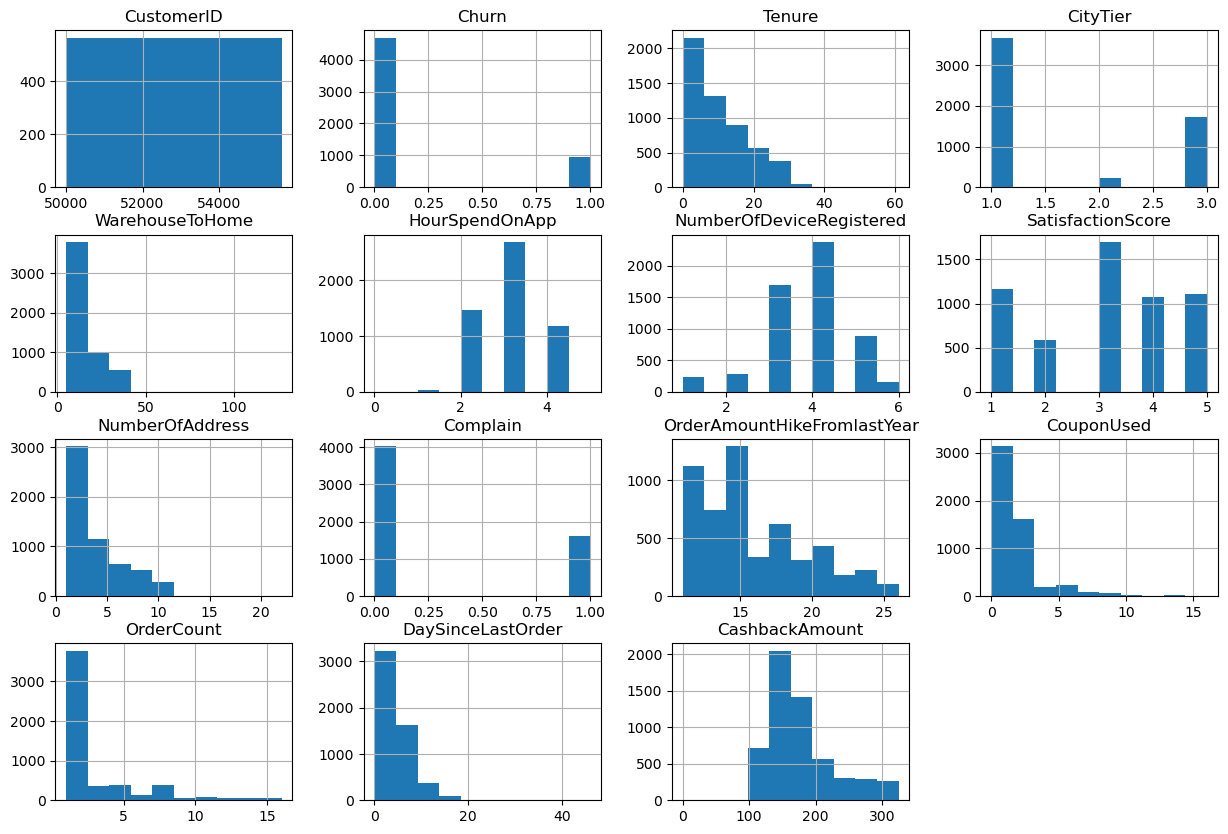

In [13]:
# Use Histogram check distributions in the dataset
df.hist(figsize=(15, 10))
plt.show()

Overall churn rate in the data set

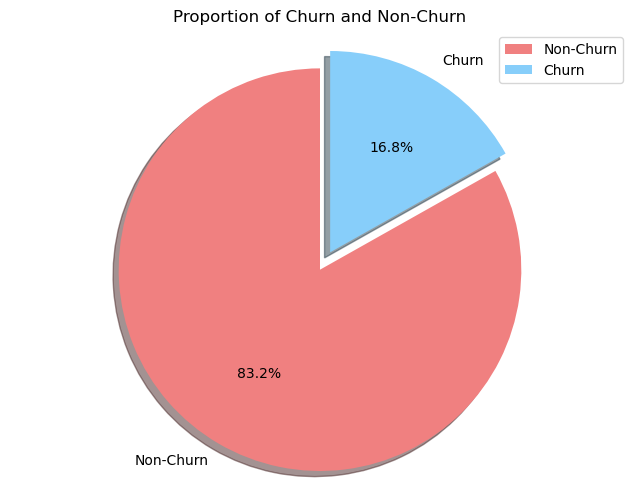

In [14]:
# Define custom colors for Churn and Non-Churn
colors = ["lightcoral", "lightskyblue"]

# Define explode values to separate slices (e.g., [0, 0.1] will separate the second slice)
explode = (0, 0.1)

# Create the pie chart
plt.figure(figsize=(8, 6), dpi=100)
plt.title("Proportion of Churn and Non-Churn", fontsize=12)
plt.pie(df["Churn"].value_counts(), labels=["Non-Churn", "Churn"],
        autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=90)

# Add a legend with custom labels
plt.legend(["Non-Churn", "Churn"], loc="best")

# Display the pie chart
plt.axis('equal')
plt.show()

- The "non-churn" class has significantly more data (83.2%) compared to the "churn" class (16.8%). This imbalance can influence the performance of machine learning models trained on this data, as the model might be biased towards predicting the "non-churn" class due to its higher occurrence. It's essential to address this imbalance during the data preprocessing stage before training a model.

2. Churn Rate and Tenure: How does the churn rate vary with the tenure of the customers? Is there a particular tenure length where churn rate spikes or drops significantly?

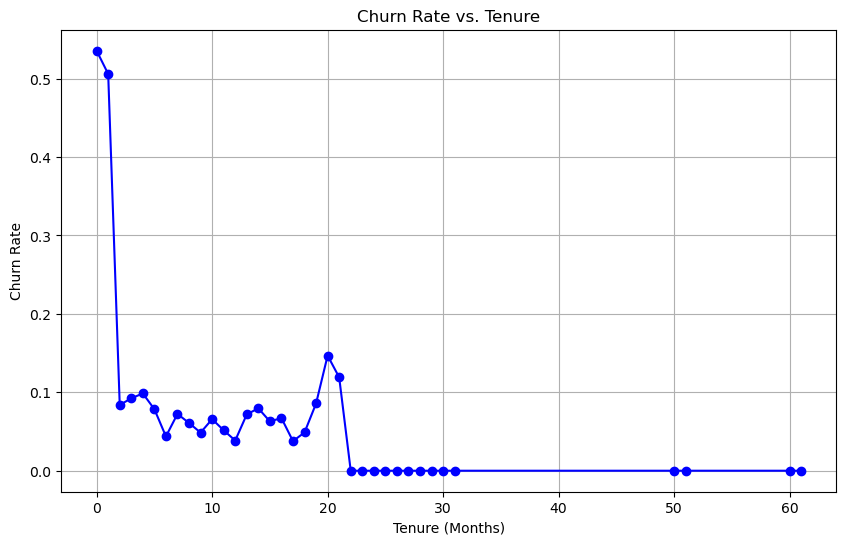

In [15]:
# Calculate the Churn Rate for each tenure length
churn_rate_by_tenure = df.groupby('Tenure')['Churn'].mean()

# Plot the Churn Rate vs. Tenure
plt.figure(figsize=(10, 6))
plt.plot(churn_rate_by_tenure.index, churn_rate_by_tenure.values, marker='o', linestyle='-', color='b')
plt.title('Churn Rate vs. Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.grid(True)

plt.show()

- This is a scatter plot titled "Churn Rate vs. Tenure." The x-axis represents Tenure in months, ranging from 0 to 60 months, and the y-axis represents the Churn Rate, ranging from 0 to 0.5. Each point on the graph represents the churn rate at a specific tenure month.
- From the plot, we can see that the churn rate is highest (above 0.5) when the tenure is very low (around 0 months). This suggests that customers are most likely to churn at the beginning of their tenure. As the tenure increases, the churn rate fluctuates but generally decreases. There are peaks in churn rates at around 10, 20, and 30 months, suggesting that there might be specific times during the customer lifecycle where customers are more likely to churn.
- After around 30 months of tenure, the churn rate stabilizes and remains relatively low (close to 0), indicating that customers with longer tenures are less likely to churn. This could mean that customers who have stayed with the service for a more extended period are more satisfied or more invested in the service, reducing the likelihood of churning.






3. Demographics and Churn: Are there any noticeable trends in churn when looking at the demographics of the customers, such as gender, marital status, or city tier?

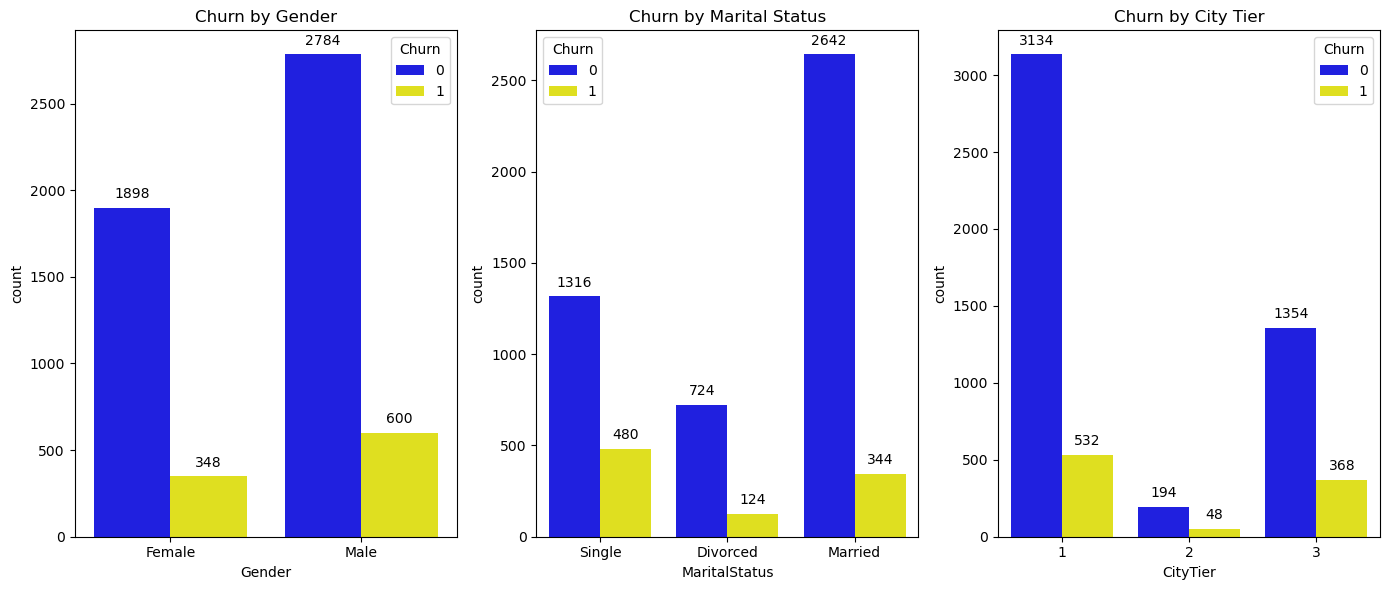

In [16]:
# Function to annotate bars with their values
def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

# Plotting Churn by Gender
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
ax1 = sns.countplot(x='Gender', hue='Churn', data=df, palette=['b', 'yellow'])
plt.title('Churn by Gender')
annotate_bars(ax1)

# Plotting Churn by Marital Status
plt.subplot(1, 3, 2)
ax2 = sns.countplot(x='MaritalStatus', hue='Churn', data=df, palette=['b', 'yellow'])
plt.title('Churn by Marital Status')
annotate_bars(ax2)

# Plotting Churn by City Tier
plt.subplot(1, 3, 3)
ax3 = sns.countplot(x='CityTier', hue='Churn', data=df, palette=['b', 'yellow'])
plt.title('Churn by City Tier')
annotate_bars(ax3)

plt.tight_layout()
plt.show()

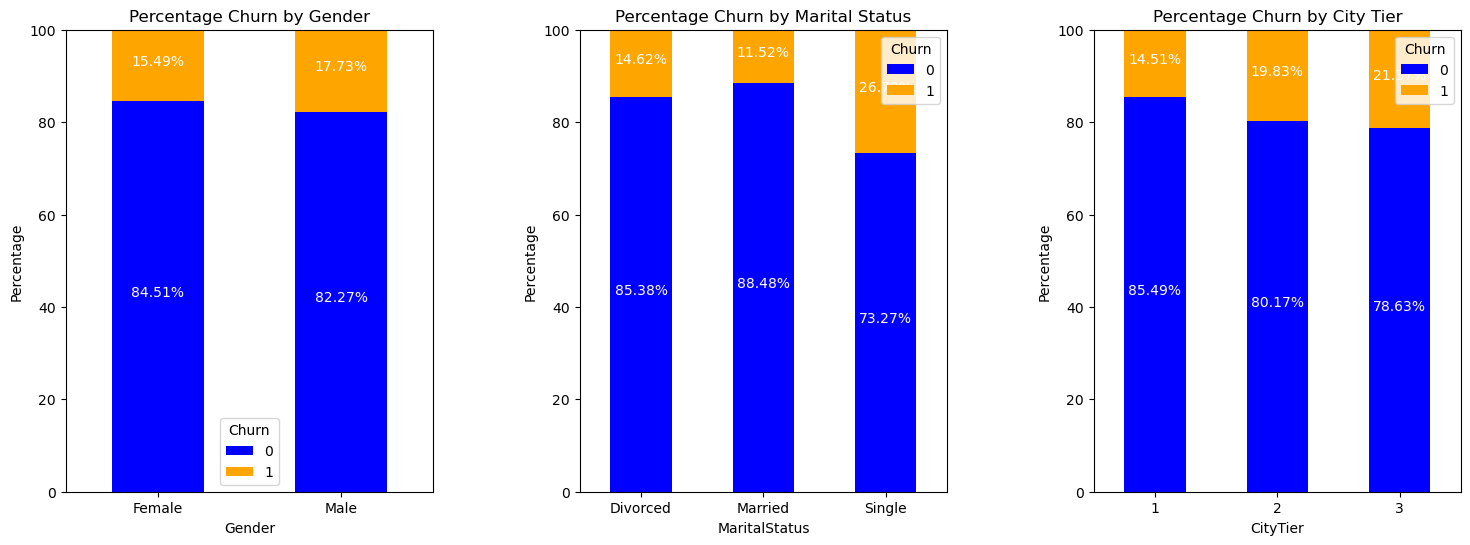

In [17]:
# Percentage Churn/not Churn
def plot_percentage_churn(data, column, position, title):
    ax = fig.add_subplot(position)
    
    # Group by column and churn and calculate the size
    group = data.groupby([column, 'Churn']).size().unstack().fillna(0)
    
    # Calculate percentage
    group_percentage = (group.T / group.T.sum()).T * 100
    
    # Plot
    group_percentage.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'orange'])
    
    # Add text for percentage
    for idx, (not_churned, churned) in enumerate(zip(group_percentage[0], group_percentage[1])):
        ax.text(idx, not_churned / 2, f'{not_churned:.2f}%', ha='center', color='white')
        ax.text(idx, not_churned + churned / 2, f'{churned:.2f}%', ha='center', color='white')
    
    ax.set_title(title)
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    
    # Set x-axis ticks and labels horizontally at the bottom
    plt.xticks(range(len(group_percentage.index)), group_percentage.index, rotation=0, ha='center')
    
fig = plt.figure(figsize=(18, 6))
plot_percentage_churn(df, 'Gender', 131, 'Percentage Churn by Gender')
plot_percentage_churn(df, 'MaritalStatus', 132, 'Percentage Churn by Marital Status')
plot_percentage_churn(df, 'CityTier', 133, 'Percentage Churn by City Tier')

# Adjust layout and add a super title
plt.subplots_adjust(hspace=.5, wspace=.4)

plt.show()

- Gender: churn rates between males and females are almost similar. Both genders have a churn rate of around 10-20%. Males having slightly higher churn.
- Marital Status: single individuals have a slightly higher churn rate compared to married and divorced individuals
- Churn seems to be higher in tier 3 cities compared to tier 1 and 2 cities.
- In conclusion, there is no significant difference in churn rates between genders. Single individuals and those living in tier 3 cities seem to have a slightly higher propensity to churn based on the data presented.

4. Visualize the total number of customers who churned for each distribution of "HourSpendOnApp" and "NumberOfDeviceRegistered

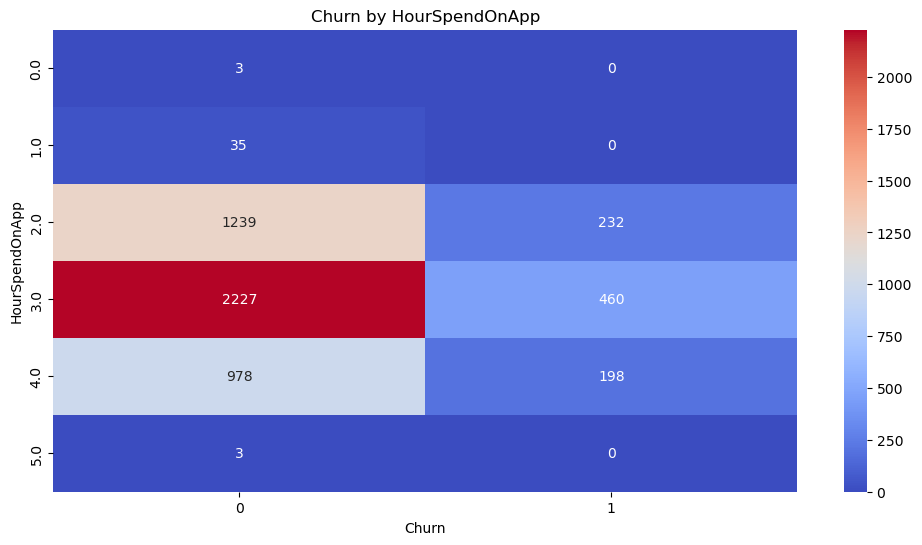

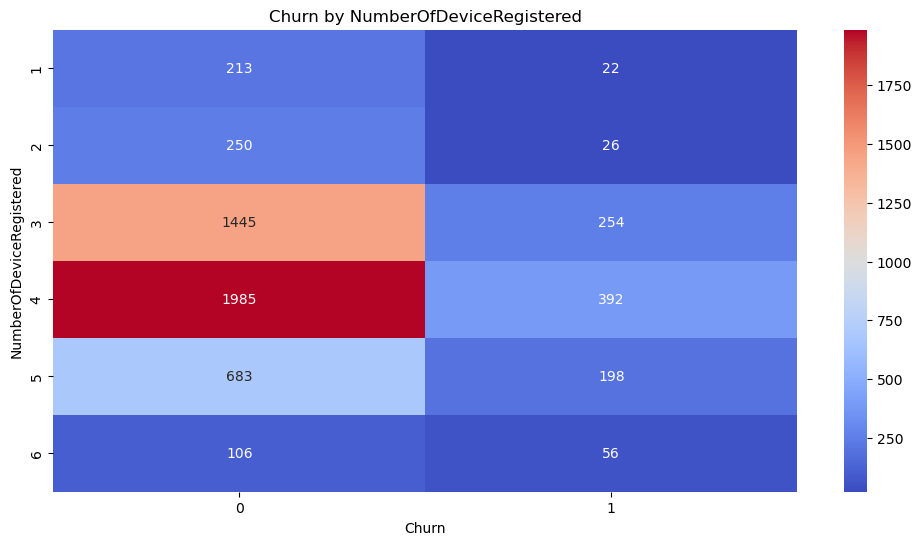

In [18]:
# Create a cross-tabulation of Churn by HourSpendOnApp
hour_spend_churn = pd.crosstab(df['HourSpendOnApp'], df['Churn'])

# Create a pivot table of Churn by NumberOfDeviceRegistered
device_registered_churn = df.pivot_table(index='NumberOfDeviceRegistered', columns='Churn', aggfunc='size', fill_value=0)

# Plot a heatmap for HourSpendOnApp
plt.figure(figsize=(12, 6))
sns.heatmap(hour_spend_churn, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title('Churn by HourSpendOnApp')
plt.xlabel('Churn')
plt.ylabel('HourSpendOnApp')
plt.show()

# Plot a heatmap for NumberOfDeviceRegistered
plt.figure(figsize=(12, 6))
sns.heatmap(device_registered_churn, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title('Churn by NumberOfDeviceRegistered')
plt.xlabel('Churn')
plt.ylabel('NumberOfDeviceRegistered')
plt.show()

5. Customer Satisfaction: How does customer satisfaction, as indicated by the satisfaction score, relate to churn? Are less satisfied customers more prone to leaving?


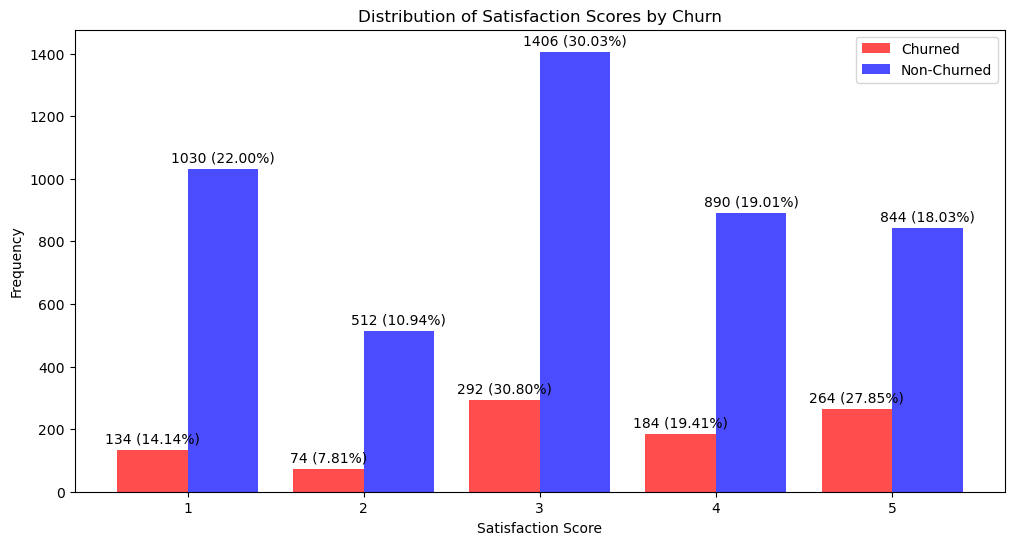

In [19]:
# Separate satisfaction scores for churned and non-churned customers
satisfaction_churned = df[df['Churn'] == 1]['SatisfactionScore']
satisfaction_non_churned = df[df['Churn'] == 0]['SatisfactionScore']

# Count the frequency of each satisfaction score for both groups
churned_counts = satisfaction_churned.value_counts().sort_index()
non_churned_counts = satisfaction_non_churned.value_counts().sort_index()

# Calculate the total counts for churned and non-churned customers
total_churned = len(satisfaction_churned)
total_non_churned = len(satisfaction_non_churned)

# Extract unique satisfaction scores
satisfaction_scores = df['SatisfactionScore'].unique()
satisfaction_scores.sort()

# Create a bar plot with separate bars for churned and non-churned customers
plt.figure(figsize=(12, 6))
width = 0.4

bars1 = plt.bar(satisfaction_scores - width/2, churned_counts, width, label='Churned', color='red', alpha=0.7)
bars2 = plt.bar(satisfaction_scores + width/2, non_churned_counts, width, label='Non-Churned', color='blue', alpha=0.7)

# Annotate the bars with the counts and percentages
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    percentage1 = (height1 / total_churned) * 100
    percentage2 = (height2 / total_non_churned) * 100
    plt.annotate(f'{int(height1)} ({percentage1:.2f}%)', xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)
    plt.annotate(f'{int(height2)} ({percentage2:.2f}%)', xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Distribution of Satisfaction Scores by Churn')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.xticks(satisfaction_scores)
plt.legend()

# Show the plot
plt.show()

- For a satisfaction score of 1, a substantial proportion (14.14%) of users have churned.
- As the satisfaction score increases to 2 and 3, the churn rate decreases to 7.81% and 10.94%, respectively.
- Interestingly, for satisfaction scores of 4 and 5, the churn rates increase again to 19.41% and 27.85%, respectively.
- This distribution indicates that both low and high satisfaction scores have higher churn rates, with the lowest churn rates appearing in the mid-range satisfaction scores (2 and 3). It seems that there might be other factors influencing churn beyond just satisfaction scores, as even highly satisfied users (scores 4 and 5) show a significant churn rate.

6. Complaints and Churn: Is there a correlation between the number of complaints a customer has made and their likelihood to churn?


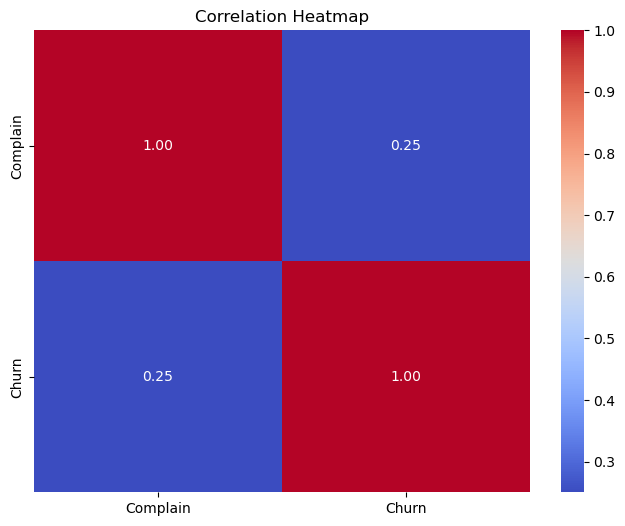

In [20]:
# Heatmap
correlation_matrix = df[['Complain', 'Churn']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- Complain and Churn have a correlation coefficient of 0.25, indicating a moderate positive relationship. This suggests that there is some degree of association where an increase in complaints is associated with an increase in churn rate.
- Since both Complain and Churn are likely binary variables (where a value of 1 could represent the presence of a complaint or churn, and 0 represents the absence), this moderate correlation suggests that customers who have lodged complaints are more likely to churn than those who have not.

7. Product Preferences: Do certain preferred product categories have higher churn rates? For example, are customers who prefer laptops and accessories more loyal than those who prefer mobile phones?


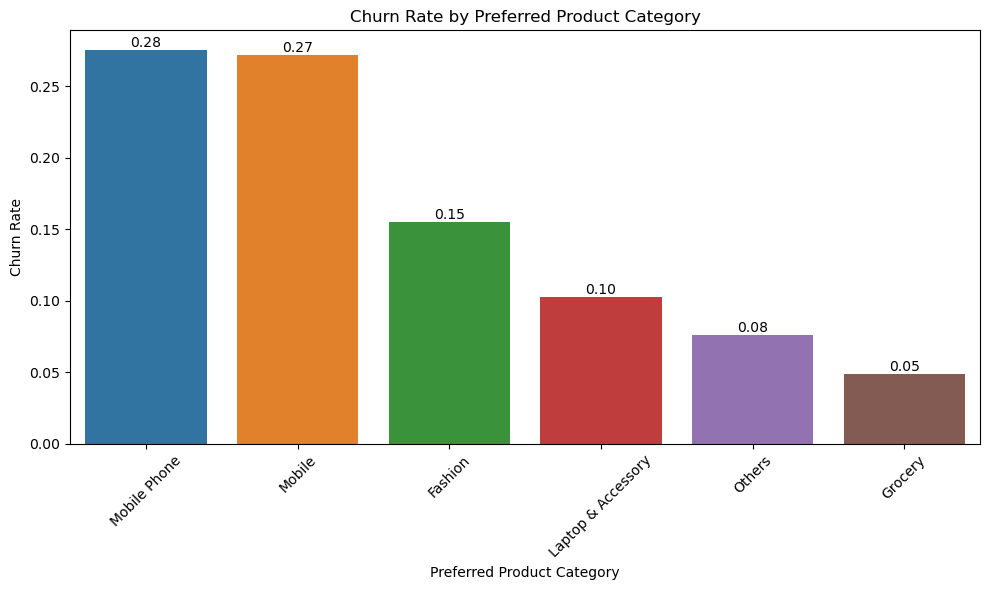

In [21]:
# Calculate churn rates and sort by descending order
product_churn_rates = df.groupby("PreferedOrderCat")["Churn"].mean().reset_index()
product_churn_rates = product_churn_rates.sort_values(by="Churn", ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="PreferedOrderCat", y="Churn", data=product_churn_rates)
plt.xlabel("Preferred Product Category")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Preferred Product Category")
plt.xticks(rotation=45)

# Add numbers directly on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

- This bar chart illustrates the churn rate among different preferred product categories. The churn rate is calculated as the proportion of users who have churned in each category. Here is an analysis of each category:
    - Mobile Phone: Has the highest churn rate of 28%.
    - Mobile: Close behind, with a churn rate of 27%.
    - Fashion: The churn rate drops significantly to 15%.
    - Laptop & Accessory: Further drops to a churn rate of 10%.
    - Others: Has a churn rate of 8%.
    - Grocery: Has the lowest churn rate of 5%.
- Conclusion: The churn rate varies significantly across different product categories, with "Mobile Phone" and "Mobile" categories having the highest churn rates. In contrast, the "Grocery" category seems to retain customers better, having the lowest churn rate. Understanding these variations can be valuable for targeted customer retention strategies.

8. Distance Factor: Does the distance from the warehouse to a customer's home have any correlation with churn? Are customers who live farther away more likely to churn?


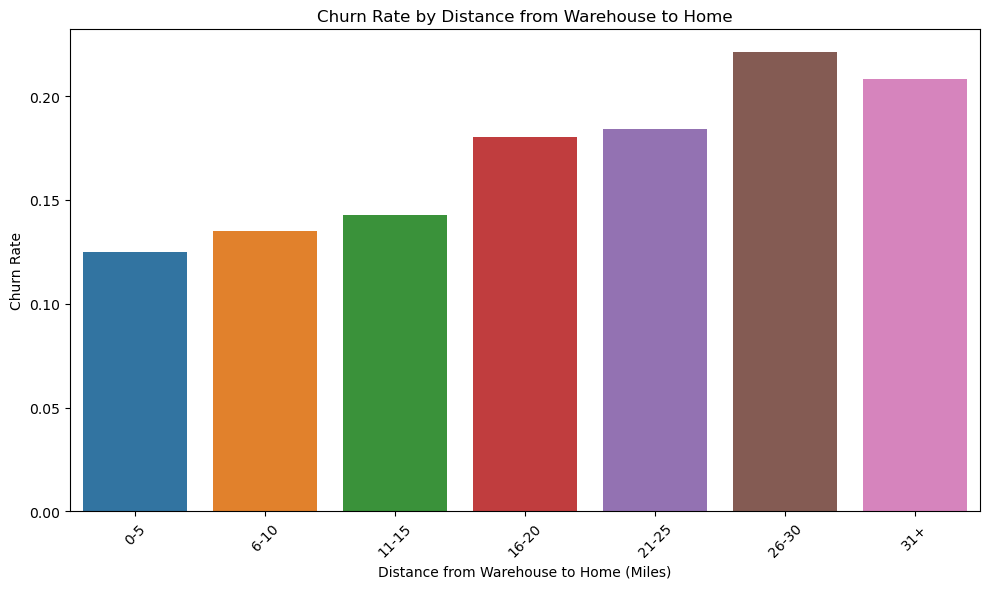

In [22]:
# Define distance bins
bins = [0, 5, 10, 15, 20, 25, 30, float("inf")] 
labels = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31+"]

# Create a new dataframe for the analysis that doesn't modify the original df
distance_df = df.copy()

distance_df["DistanceGroup"] = pd.cut(distance_df["WarehouseToHome"], bins=bins, labels=labels, include_lowest=True)
churn_rates = distance_df.groupby("DistanceGroup")["Churn"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="DistanceGroup", y="Churn", data=churn_rates)
plt.xlabel("Distance from Warehouse to Home (Miles)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Distance from Warehouse to Home")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

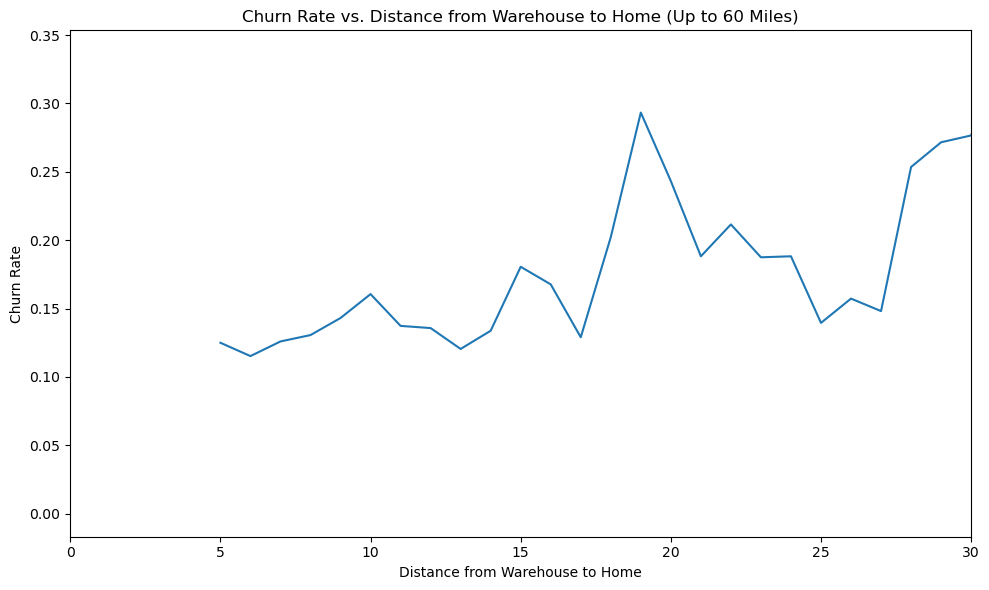

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="WarehouseToHome", y="Churn", data=distance_df, ci=None)
plt.xlabel("Distance from Warehouse to Home")
plt.ylabel("Churn Rate")
plt.title("Churn Rate vs. Distance from Warehouse to Home (Up to 60 Miles)")
plt.xlim(0, 30)  # Limit x-axis to 0 to 30 miles
plt.tight_layout()
plt.show()

- The bar chart illustrates the churn rates segmented by various distance ranges from the warehouse to a user's home:
    - 0-5 miles: The churn rate is 13%, indicating that the closer distance range has a relatively lower churn rate.
    - 6-10 miles to 21-25 miles: The churn rate fluctuates slightly but stays below 20%.
    - 26-30 miles: The churn rate peaks at 28%, representing the highest churn rate among all the distance categories.
    - 31+ miles: The churn rate decreases again but is still relatively high compared to shorter distances.
- The churn rate doesn’t show a straightforward linear relationship with distance. However, a noticeable peak in the churn rate occurs at the 26-30 miles range. Generally, the churn rate seems to be lower for distances closer to the warehouse and fluctuates as the distance increases, with a significant peak at a higher distance range.

9. Payment Methods: Is there a preferred payment mode among customers who churn, and how does it compare with those who remain?


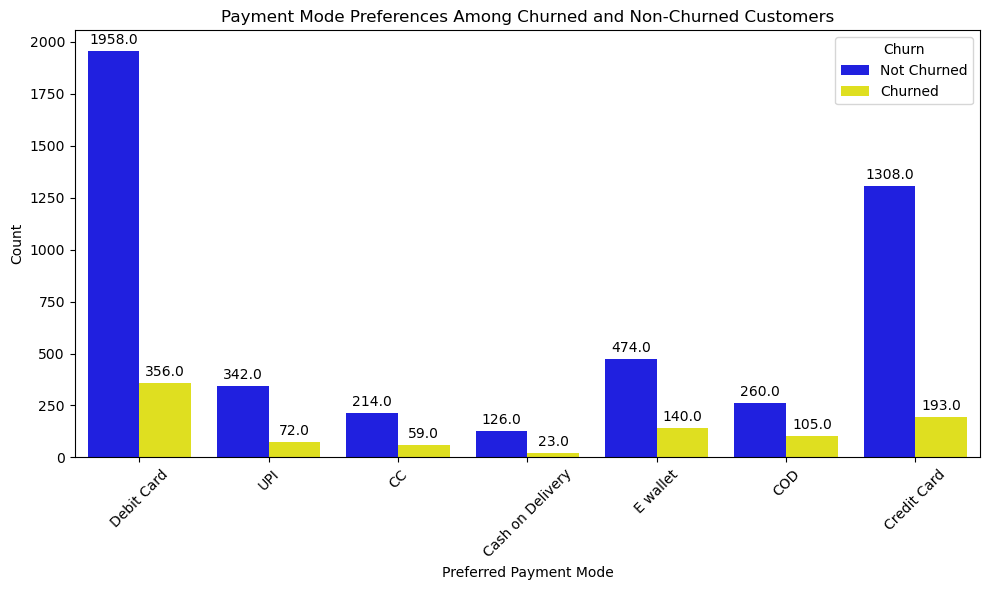

In [24]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="PreferredPaymentMode", hue="Churn", data=df, palette=['b', 'yellow'] )
plt.xlabel("Preferred Payment Mode")
plt.ylabel("Count")
plt.title("Payment Mode Preferences Among Churned and Non-Churned Customers")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["Not Churned", "Churned"])

# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

10. Financial Behavior: How do the order amount hike from the previous year, coupon usage, and the cashback amount received by customers relate to their likelihood of churning?


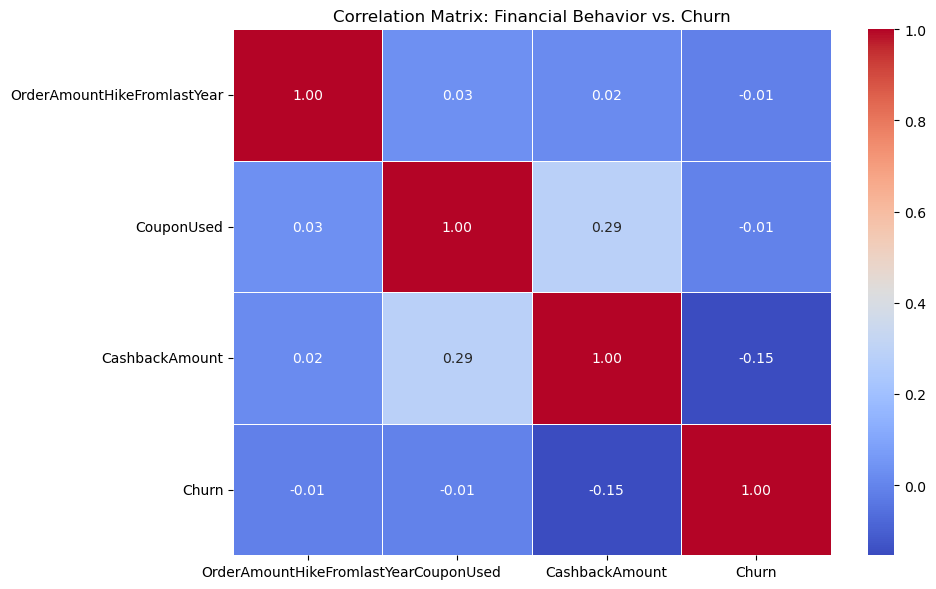

In [25]:
# Select relevant columns
financial_columns = ["OrderAmountHikeFromlastYear", "CouponUsed", "CashbackAmount"]

# Calculate the correlation matrix
correlation_matrix = df[financial_columns + ["Churn"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Financial Behavior vs. Churn")
plt.tight_layout()
plt.show()

- OrderAmountHikeFromlastYear and Churn have a correlation coefficient of -0.007075, indicating a very weak negative relationship.
- CouponUsed and Churn have a correlation coefficient of -0.001430, indicating virtually no linear relationship.
- CashbackAmount and Churn have a correlation coefficient of -0.154161, suggesting a weak negative relationship.

11. Service Utilization: Do customers with a higher number of addresses, which may indicate a higher complexity of service use, have different churn rates compared to those with fewer addresses?

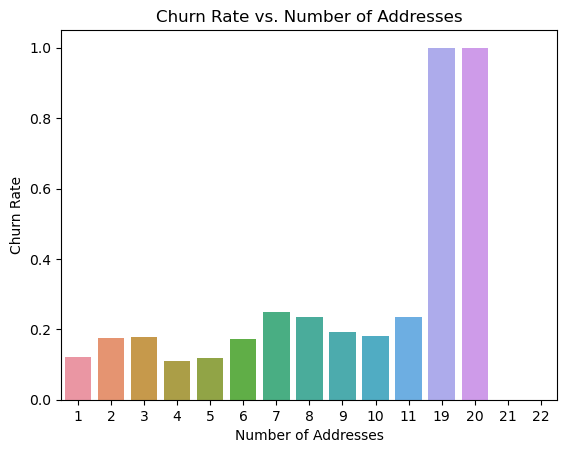

In [26]:
churn_by_address = df.groupby('NumberOfAddress')['Churn'].mean().reset_index()
sns.barplot(x='NumberOfAddress', y='Churn', data=churn_by_address)
plt.xlabel('Number of Addresses')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs. Number of Addresses')
plt.show()

In [27]:
churn_by_address

,NumberOfAddress,Churn
0,1,0.121294
1,2,0.176041
2,3,0.178404
3,4,0.110544
4,5,0.117338
5,6,0.172775
6,7,0.250000
7,8,0.235714
8,9,0.192469
9,10,0.180412


- Customers with fewer addresses tend to have lower churn rates, while customers with a higher number of addresses may have higher churn rates. Additionally, it's worth noting that in the last four groups (with 19, 20, 21, and 22 addresses), all customers have churned or none have, which could indicate some outliers in the dataset.

Create a heatmap to visualize the correlations between numeric columns in the dataset

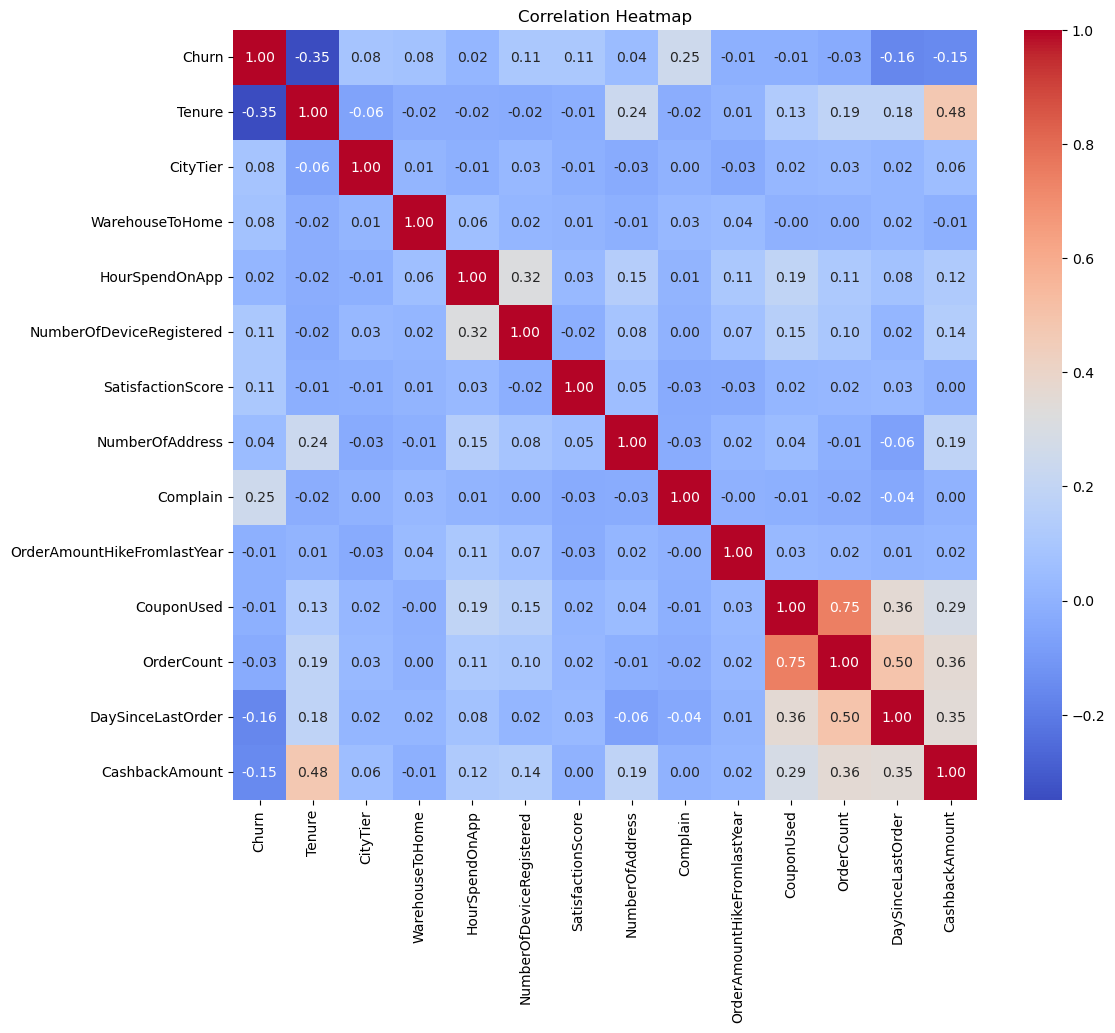

In [28]:
# Select only numeric columns (excluding 'CustomerID')
numeric_columns = df.select_dtypes(include=['number']).drop(columns=['CustomerID'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

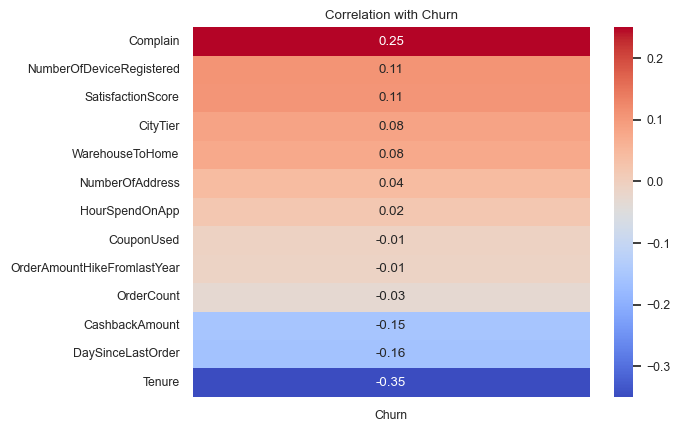

In [29]:
# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Get the correlations of predictor variables with the target variable 'Churn'
correlations_with_churn = corr_matrix['Churn'].drop('Churn')  # Exclude the correlation with itself

# Sort correlation values in descending order
correlations_sorted = correlations_with_churn.sort_values(ascending=False)

# Create a heatmap of the correlations with the target variable 'Churn'
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(correlations_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Churn')
plt.show()

**Variables and their correlation values with Churn:** 
- **Complain:** 0.25 (Positive correlation) - This suggests that as the number of complaints increases, the likelihood of churn also tends to increase. 
- **NumberOfDeviceRegistered:** 0.11 (Positive correlation) - A slight positive relationship between the number of devices registered and churn. 
- **SatisfactionScore:** 0.11 (Positive correlation) - The higher the satisfaction score, the more likely churn is, which is a bit counterintuitive. 
- **CityTier:** 0.08 (Positive correlation) - A slight positive relationship between the tier of the city and churn. 
- **NumberOfAddress:** 0.04 and **AmountHikeFromLastYear:** 0.04 - Both show very weak positive correlations with churn. 
- **WarehouseToHome:** 0.03, **CouponUsed:** 0.01, and **HourSpendOnApp:** -0.01 - These variables have almost no correlation with churn. 
- **OrderCount:** -0.02 (Negative correlation) - Indicates a very weak negative relationship. As the order count increases slightly, churn might decrease slightly. 
- **DaySinceLastOrder:** -0.15 and **Cashback Amount:** -0.35 - Both indicate negative correlations with churn. Particularly, as the cashback amount increases, the likelihood of churn decreases more significantly.

# PART II:  Make a minimum viable product (MVP)

In [30]:
# Feature selection for baseline model
# Make a copy dataset
df_baseline_model = df.copy()

# Remove 'CustomerID' from the features
df_baseline_model = df_baseline_model.drop(columns=['CustomerID'])

# Select columns with integer and float data types
numeric_columns = df_baseline_model.select_dtypes(include=['int64', 'float64'])

# Fill missing values with zeros for all numeric columns
numeric_columns = numeric_columns.fillna(0)

# Extract the features
X = numeric_columns.drop(columns=['Churn'])

# Target variable
y = numeric_columns['Churn']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       941
           1       0.77      0.44      0.56       185

    accuracy                           0.89      1126
   macro avg       0.83      0.71      0.75      1126
weighted avg       0.88      0.89      0.87      1126



- Precision for class 0 (Not Churn) is 0.90, indicating that 90% of the predictions for "Not Churn" were correct.
- Precision for class 1 (Churn) is 0.77, meaning that 77% of the predictions for "Churn" were correct.
- Recall for class 0 (Not Churn) is 0.97, indicating that 97% of the actual "Not Churn" cases were correctly identified.
- Recall for class 1 (Churn) is 0.44, meaning that 44% of the actual "Churn" cases were correctly identified.
- The F1-Score for class 0 is 0.93, which is a good balance between precision and recall.
- The F1-Score for class 1 is 0.56, indicating a lower balance between precision and recall for class 1.
- Overall, the model performs well in terms of precision and recall for class 0 (Not Churn), indicating that it can accurately identify non-churn cases. However, there is room for improvement in the precision and recall for class 1 (Churn), suggesting that the model may need to be tuned or additional features considered to better predict churn cases.

# PART III: Preprocessing, Feature engineering & complex model

- Data Separation: Choose the most relevant features for predicting the target. Divide the dataset into categorical and numerical for specific preprocessing.
- Handle Missing Values: Impute missing values appropriately for numerical and categorical data.
- Handle Outliers: Detect and mitigate outliers through capping, transformation, or removal.
- Train-Test Split: Split the dataset while ensuring class balance (using ImbPipeline)
- Churn Prediction Model: RidgeClassifier, RandomForestClassifier, Support Vector Classifier (SVC), XGBClassifier.
    - Preprocessing Pipeline: Create a ColumnTransformer to apply different preprocessing steps to numerical and categorical data, such as scaling and encoding, respectively.
    - Modeling Pipeline: Build a pipeline with preprocessing steps and the machine learning model, incorporating ImbPipeline for imbalanced classes.
    - Model Selection and Hyperparameter Tuning: Use cross-validation to evaluate different models and hyperparameter tuning techniques GridSearchCV to find the optimal model configuration.
    - Evaluation: Assess the final model's performance on the test set using appropriate metrics. Given the potential class imbalance, focus on metrics like precision, recall, F1-score, and ROC-AUC, accuracy.
- Feature Importances
- Weaknesses of the model
- Documentation:Model Saving.

Data Separation

In [31]:
# Define categorical columns
cat_columns = [ 'PreferredLoginDevice','CityTier', 'PreferredPaymentMode', 'Gender','PreferedOrderCat', 'MaritalStatus']

# Define numerical columns
num_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                   'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
                   'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'Complain']

Handle missing values

In [32]:
# Check missing values
def missing_check(df):
  missing = df.isnull().sum()
  missing_per = round(missing/len(df),4)*100
  unique_val = df.nunique()
  type_data = df.dtypes
  df = pd.DataFrame({'Missing_values':missing,
                    'Percent of Missing (%)':missing_per,
                    'Numbers of Unique':unique_val,
                    'Data type':type_data}).sort_values("Percent of Missing (%)",ascending=False)
  return df
pd.set_option("display.max_rows",None)
missing_check(df)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
DaySinceLastOrder,307,5.45,22,float64
OrderAmountHikeFromlastYear,265,4.71,16,float64
Tenure,264,4.69,36,float64
OrderCount,258,4.58,16,float64
CouponUsed,256,4.55,17,float64
HourSpendOnApp,255,4.53,6,float64
WarehouseToHome,251,4.46,34,float64
CustomerID,0,0.00,5630,int64
MaritalStatus,0,0.00,3,object
Complain,0,0.00,2,int64


In [33]:
# Columns to be filled with median
median_fill_cols = [
    'DaySinceLastOrder', 
    'OrderAmountHikeFromlastYear', 
    'Tenure', 
    'OrderCount', 
    'WarehouseToHome', 'HourSpendOnApp','CouponUsed']

# Loop over the columns and impute missing values with median
for col in median_fill_cols:
    df[col] = df[col].fillna(df[col].median())

# Check if there are any missing values left
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Check outliers

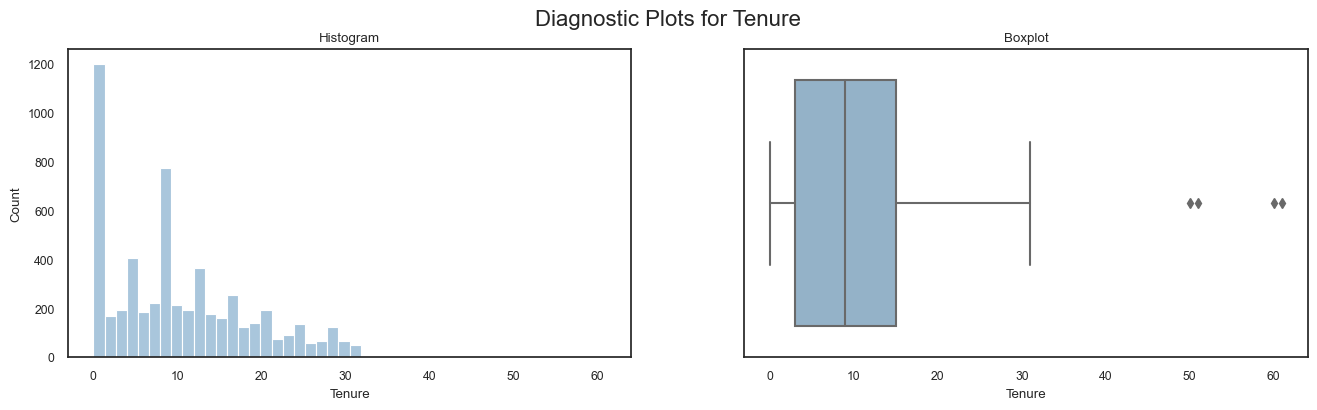

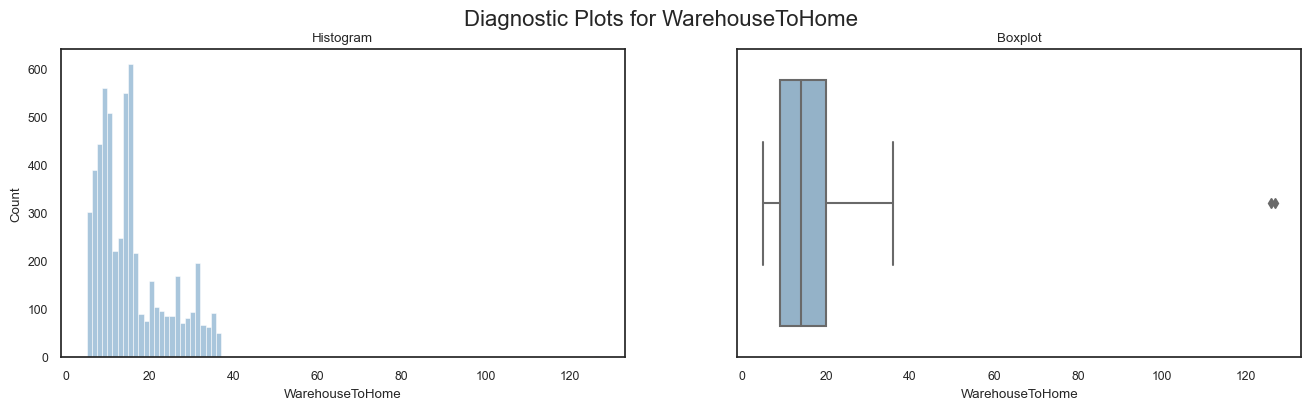

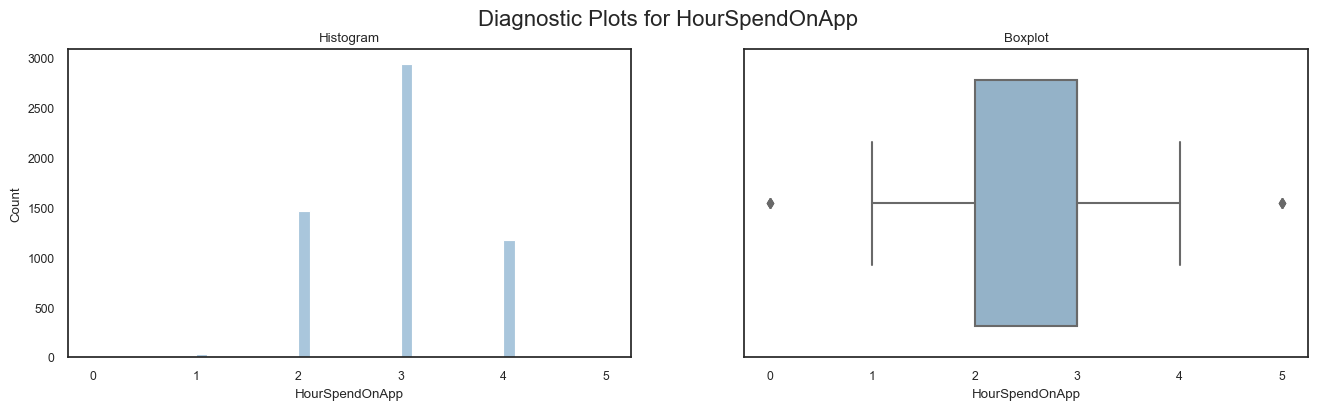

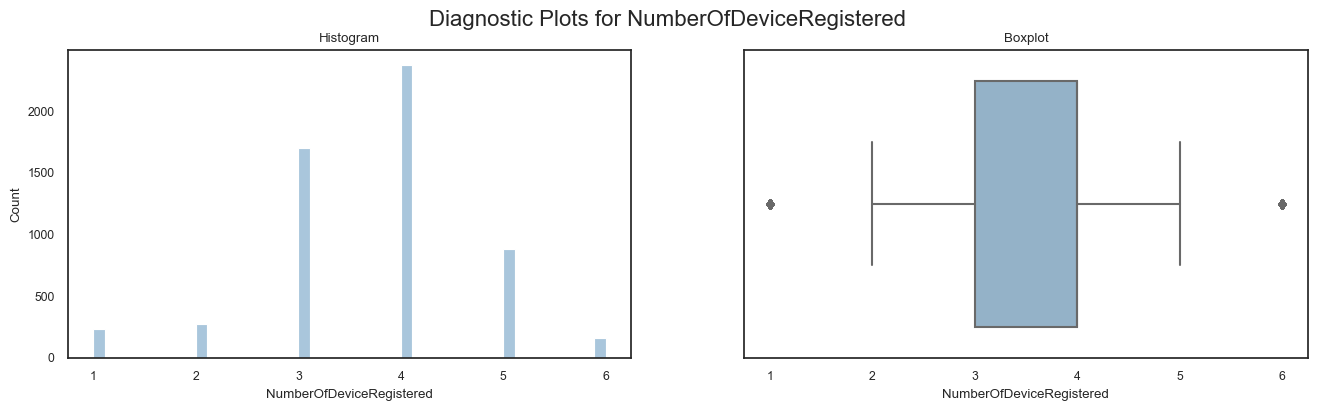

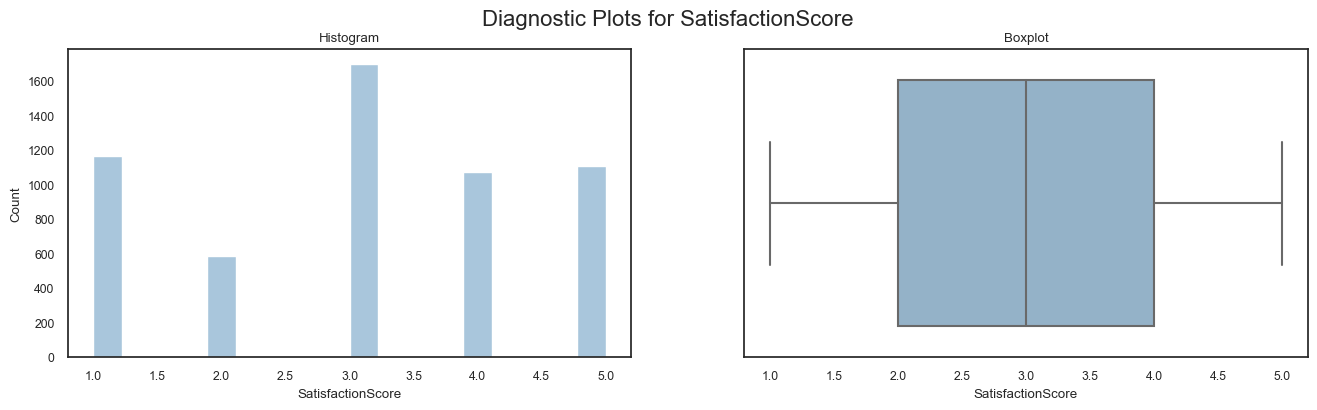

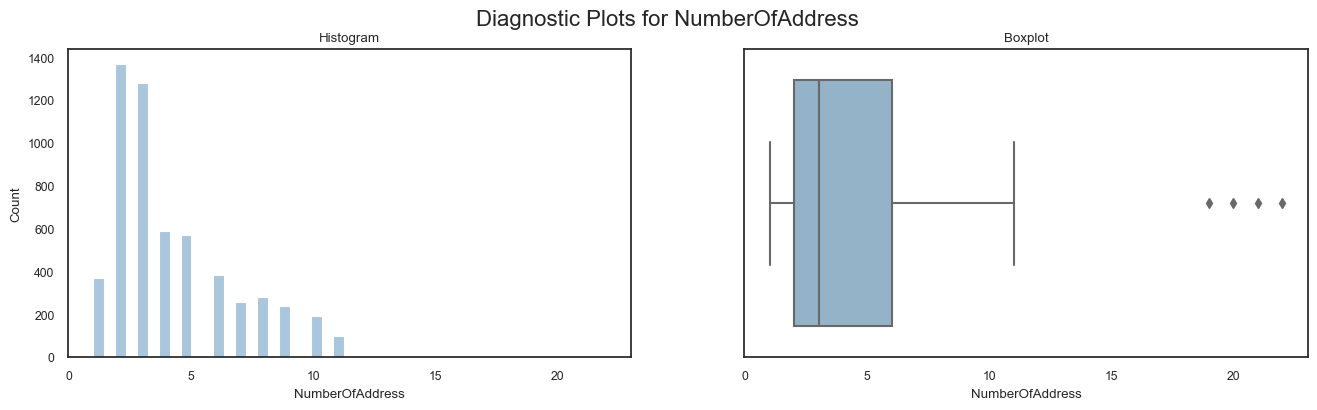

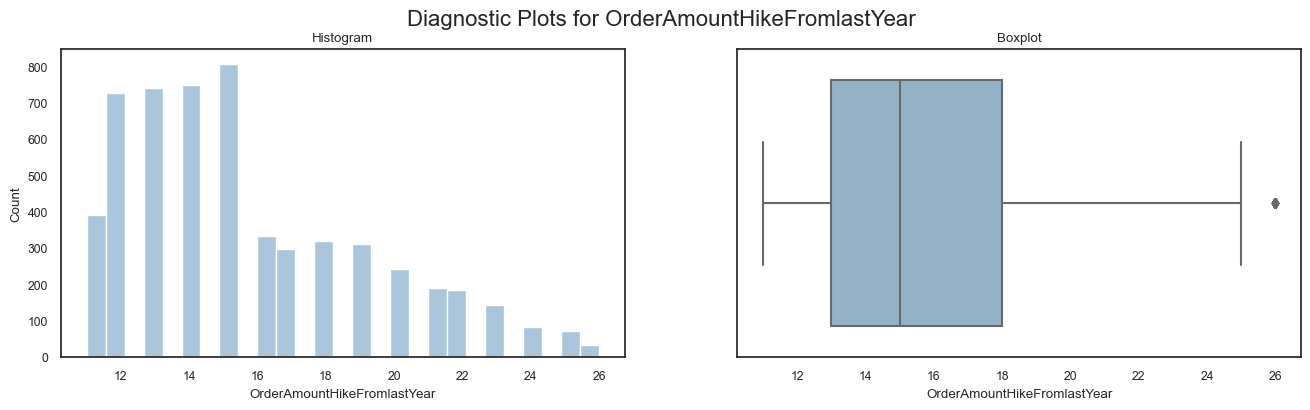

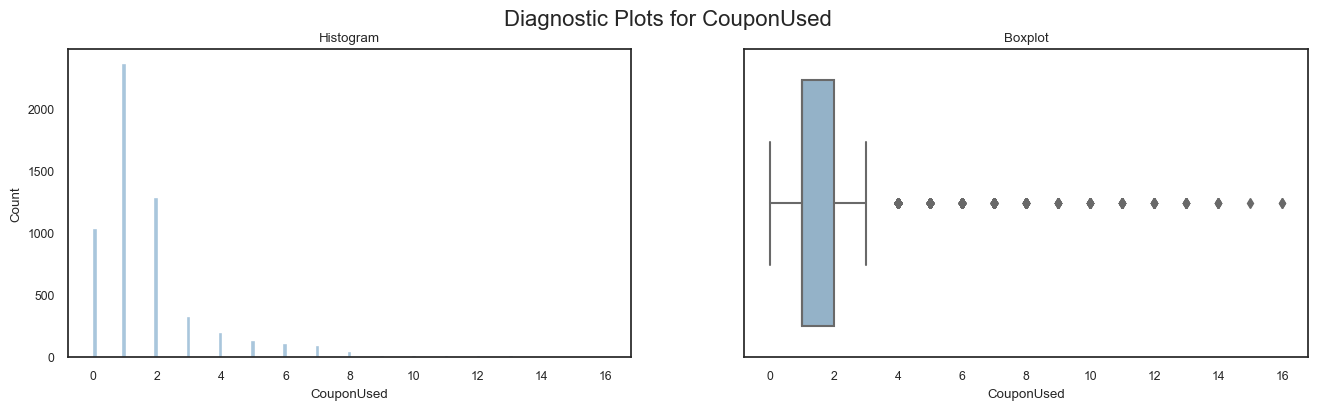

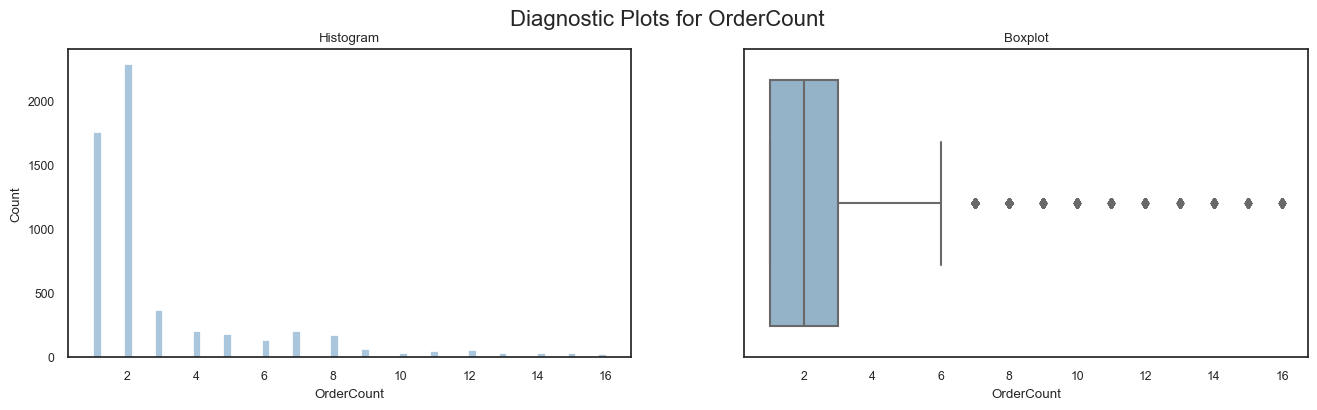

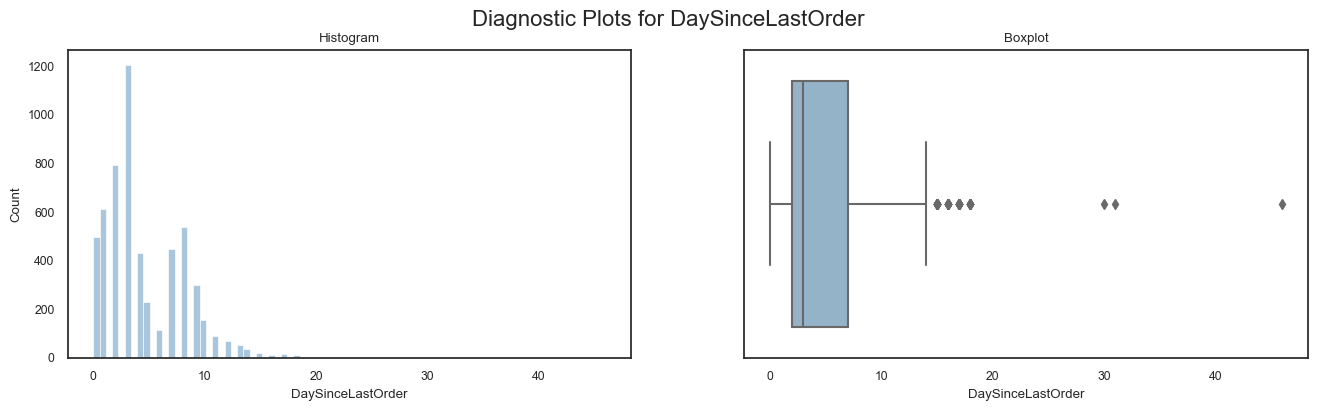

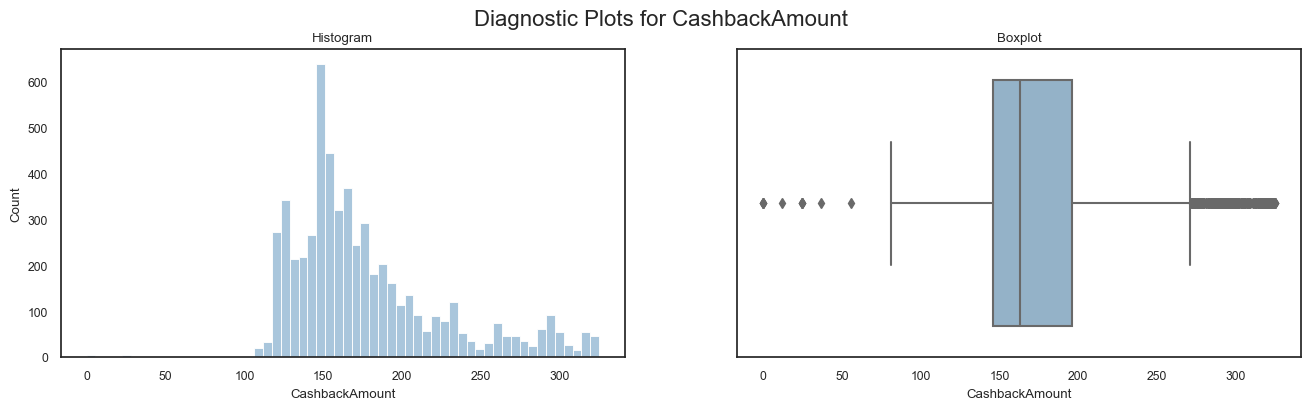

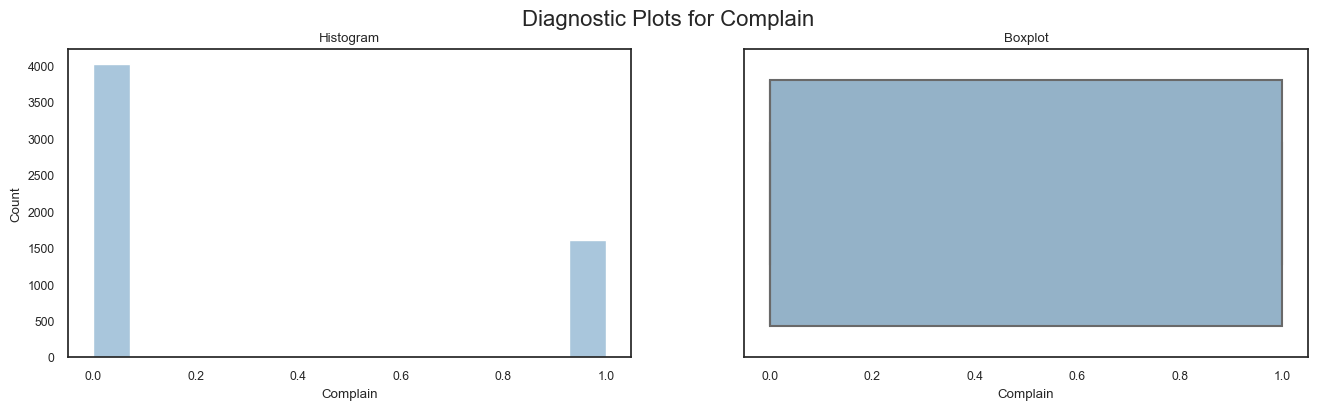

                         Column        mean  median        std
0                        Tenure   10.134103     9.0   8.357951
1               WarehouseToHome   15.566785    14.0   8.345961
2                HourSpendOnApp    2.934636     3.0   0.705528
3      NumberOfDeviceRegistered    3.688988     4.0   1.023999
4             SatisfactionScore    3.066785     3.0   1.380194
5               NumberOfAddress    4.214032     3.0   2.583586
6   OrderAmountHikeFromlastYear   15.674600    15.0   3.591058
7                    CouponUsed    1.716874     1.0   1.857640
8                    OrderCount    2.961812     2.0   2.879248
9             DaySinceLastOrder    4.459325     3.0   3.570626
10               CashbackAmount  177.221492   163.0  49.193869
11                     Complain    0.284902     0.0   0.451408


In [34]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    ax1 = plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=variable)
    ax1.set_title('Histogram')

    # Boxplot (use x parameter)
    ax2 = plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=variable)
    ax2.set_title('Boxplot')

    # The main title
    plt.suptitle(f'Diagnostic Plots for {variable}', fontsize=16)

    # Show the plot
    plt.show()
# Create an empty list to keep the central tendency and variation value
result = []

# For loop in each numerical column
for col in df[num_columns].columns:
    
    # Call the function
    diagnostic_plots(df, col)
    
    # Calculate the central tendency and standard deviation
    mean, std, median = df[col].mean(), df[col].std(), df[col].median()
    
    # Add to the list
    result.append([col, mean, median, std])

# Create a dataframe and show the result
ct_analysis = pd.DataFrame(result, columns=['Column', 'mean', 'median', 'std'])
print(ct_analysis)

Handle outliers

In [35]:
# From the boxplot visualization above, remove the outliers
# Remove outlier at Tenure > 35
df = df[df['Tenure'] <= 35]

# Remove outlier at WarehouseToHome > 60
df = df[df['WarehouseToHome'] <= 60]

# Remove outlier at NumberOfAddress > 15
df = df[df['NumberOfAddress'] <= 15]

# Remove outlier at DaySinceLastOrder > 25
df = df[df['DaySinceLastOrder'] <= 25]

Train-Test Split

In [36]:
# Split the data into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Churn Prediction Model

RidgeClassifier - Hyperparameter Tuning and Evaluation

In [37]:
# Define a dictionary of pipelines
numeric_features = Pipeline([
    ('scaler', 'passthrough'),
    ('features', FeatureUnion([
        ('pca', PCA(n_components=4)),
        ('kbest', SelectKBest(score_func=f_classif, k='all'))
    ]))
])

# Categorical features: pipeline with one-hot encoding, SVD, and feature selection
categorical_features = Pipeline([
    ('encoder', OneHotEncoder()),
    ('features', FeatureUnion([
        ('svd', TruncatedSVD(n_components=4)),
        ('kbest', SelectKBest(score_func=f_classif, k='all'))
    ]))
])

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_features, num_columns),
        ('cat', categorical_features, cat_columns)
    ]
)

# Define a dictionary of pipelines for different classifiers
pipelines = {
    'Ridge': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', RidgeClassifier(random_state=42))
    ])
}

# Scalings to be tested in GridSearchCV
scalers = [StandardScaler(), MinMaxScaler()]

# Set up the grid search parameter grids
param_grid = {
    'Ridge': {
        'preprocessor__num__scaler': scalers,
        'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 10.0, 100.0], 
        'classifier__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Different solvers
        'classifier__max_iter': [1000, 5000, 10000]  # Different maximum iterations
    }
}


# Perform grid search and print results using the updated cross-validation and scoring
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Training score for {name}: {grid_search.best_score_:.4f}")

    # Evaluate on the test set
    y_pred_Ridge = grid_search.predict(X_test)
    print(f"Test score for {name}: {accuracy_score(y_test, y_pred_Ridge):.4f}")
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred_Ridge)}")
    print(f"ROC AUC Score for {name}: {roc_auc_score(y_test, y_pred_Ridge)}")


Best parameters for Ridge: {'classifier__alpha': 0.01, 'classifier__max_iter': 1000, 'classifier__solver': 'lsqr', 'preprocessor__num__scaler': MinMaxScaler()}
Training score for Ridge: 0.7919
Test score for Ridge: 0.8016
Classification report for Ridge:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       956
           1       0.42      0.83      0.56       168

    accuracy                           0.80      1124
   macro avg       0.69      0.81      0.71      1124
weighted avg       0.88      0.80      0.83      1124

ROC AUC Score for Ridge: 0.814679218967922


- Best Parameters for Ridge:
    - 'classifier__alpha': 0.01
    - 'classifier__max_iter': 1000
    - 'classifier__solver': 'lsqr'
    - 'preprocessor__num__scaler': MinMaxScaler()
- Training Score for Ridge:
    - Training score (accuracy) for Ridge is 0.7919, which means the model correctly predicted about 79.19% of the training data.
- Test Score for Ridge:
    - Test score (accuracy) for Ridge is 0.80, which means the model correctly predicted about 80% of the test data. This is a good performance and suggests that the model generalizes well to unseen data
- ROC AUC Score for Ridge: The ROC AUC score is 0.81, which indicates the ability of the model to distinguish between positive and negative classes. An ROC AUC score of 0.5 would indicate random chance, so a score of 0.81 suggests that the model is better than random, but there is room for improvement, especially if higher discrimination is desired.

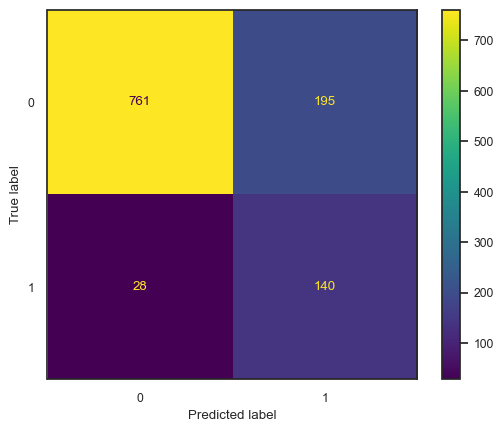

In [38]:
# Visualize the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_Ridge)
ConfusionMatrixDisplay(cm_test).plot()
plt.show()

- True Positives (TP): The bottom right cell (140) represents the true positives - the cases where the model correctly predicted class 1.
- True Negatives (TN): The top left cell (761) represents the true negatives - the cases where the model correctly predicted class 0.
- False Positives (FP): The top right cell (195) represents the false positives - the cases where the model incorrectly predicted class 1, but the true class is 0.
- False Negatives (FN): The bottom left cell (28) represents the false negatives - the cases where the model incorrectly predicted class 0, but the true class is 1.

RandomForestClassifier - Hyperparameter Tuning and Evaluation

In [39]:
# Define a dictionary of pipelines
numeric_features = Pipeline([
    ('scaler', 'passthrough'),
    ('features', FeatureUnion([
        ('pca', PCA(n_components=4)),
        ('kbest', SelectKBest(score_func=f_classif, k='all'))
    ]))
])

# Categorical features: pipeline with one-hot encoding, SVD, and feature selection
categorical_features = Pipeline([
    ('encoder', OneHotEncoder()),
    ('features', FeatureUnion([
        ('svd', TruncatedSVD(n_components=4)),
        ('kbest', SelectKBest(score_func=f_classif, k='all'))
    ]))
])

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_features, num_columns),
        ('cat', categorical_features, cat_columns)
    ]
)

# Define a dictionary of pipelines for different classifiers
pipelines = {
    'RandomForest': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
}

# Scalings to be tested in GridSearchCV
scalers = [StandardScaler(), MinMaxScaler()]

# Set up the grid search parameter grids
param_grid = {
    'RandomForest': {
        'preprocessor__num__scaler': scalers,
        'classifier__n_estimators': [50, 100, 200],             # Number of trees in the forest
        'classifier__max_depth': [None, 10, 20, 30],            # Maximum depth of the tree
        'classifier__max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider for the best split
    }
}

# Perform grid search and print results using the updated cross-validation and scoring
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Training score for {name}: {grid_search.best_score_:.4f}")

    # Evaluate on the test set
    y_pred_RF = grid_search.predict(X_test)
    print(f"Test score for {name}: {accuracy_score(y_test, y_pred_RF):.4f}")
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred_RF)}")
    print(f"ROC AUC Score for {name}: {roc_auc_score(y_test, y_pred_RF)}")

Best parameters for RandomForest: {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 200, 'preprocessor__num__scaler': MinMaxScaler()}
Training score for RandomForest: 0.9448
Test score for RandomForest: 0.9706
Classification report for RandomForest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       956
           1       0.94      0.86      0.90       168

    accuracy                           0.97      1124
   macro avg       0.96      0.93      0.94      1124
weighted avg       0.97      0.97      0.97      1124

ROC AUC Score for RandomForest: 0.9263174935246065


- Training Score vs. Test Score: In this case, the training score is 0.94, and the test score is 0.97. While the training score is slightly lower than the test score, it's still very high. The fact that the test score is also high and close to the training score suggests that there may not be significant overfitting. Overfitting is more likely when there's a large gap between the training and test scores.
- ROC AUC Score: The ROC AUC score for the Random Forest classifier is 0.926, which is a good score and indicates that the model is performing reasonably well in distinguishing between positive and negative classes.

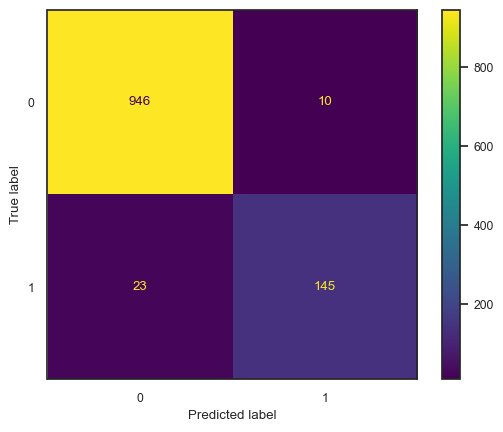

In [40]:
# Visualize the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_RF)
ConfusionMatrixDisplay(cm_test).plot()
plt.show()

- True Positives (TP): The bottom right cell (145) signifies the cases correctly identified as class 1.
- True Negatives (TN): The top left cell (946) represents the cases correctly identified as class 0.
- False Positives (FP): The top right cell (10) represents the cases where the model incorrectly predicted class 1, but they actually belong to class 0.
- False Negatives (FN): The bottom left cell (23) represents the cases where the model incorrectly predicted class 0, but they actually belong to class 1.

Support Vector Classifier (SVC) - Hyperparameter Tuning and Evaluation

In [41]:
# Define a dictionary of pipelines
numeric_features = Pipeline([
    ('scaler', 'passthrough'),
    ('features', FeatureUnion([
        ('pca', PCA()),
        ('kbest', SelectKBest(score_func=f_classif, k='all'))
    ]))
])

# Categorical features: pipeline with one-hot encoding, SVD, and feature selection
categorical_features = Pipeline([
    ('encoder', OneHotEncoder()),
    ('features', FeatureUnion([
        ('svd', TruncatedSVD()),
        ('kbest', SelectKBest(score_func=f_classif, k='all'))
    ]))
])

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_features, num_columns),
        ('cat', categorical_features, cat_columns)
    ]
)

# Define a dictionary of pipelines for different classifiers
pipelines = {
    'SVC': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', SVC(random_state=42))
    ])
}

# Scalings to be tested in GridSearchCV
scalers = [StandardScaler(), MinMaxScaler()]

# Set up the grid search parameter grids
param_grid = {
    'SVC': {
        'preprocessor__num__scaler': scalers,
        'classifier__C': [0.01, 0.1, 1.0, 10.0],  # SVM regularization parameter
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Different kernel functions
    }
}

# Perform grid search and print results using the updated cross-validation and scoring
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Training score for {name}: {grid_search.best_score_:.4f}")
    
    # Evaluate on the test set
    y_pred_SVC = grid_search.predict(X_test)
    print(f"Test score for {name}: {accuracy_score(y_test, y_pred_SVC):.4f}")
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred_SVC)}")
    print(f"ROC AUC Score for {name}: {roc_auc_score(y_test, y_pred_SVC)}")

Best parameters for SVC: {'classifier__C': 10.0, 'classifier__kernel': 'rbf', 'preprocessor__num__scaler': StandardScaler()}
Training score for SVC: 0.9377
Test score for SVC: 0.9698
Classification report for SVC:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       956
           1       0.88      0.92      0.90       168

    accuracy                           0.97      1124
   macro avg       0.93      0.95      0.94      1124
weighted avg       0.97      0.97      0.97      1124

ROC AUC Score for SVC: 0.9503262602111975


- Training Score vs. Test Score: In this case, the training score is 0.9381, and the test score is 0.9698. Similar to the previous cases, the training score is slightly lower than the test score, but both scores are high. This suggests that there may not be significant overfitting.
- Classification Report: The precision, recall, and F1-score for both classes (0 and 1) are provided, as well as the weighted average. The classifier performs well on the test data with high precision, recall, and F1-score values for both classes.
- ROC AUC Score: The ROC AUC score for the SVC is 0.95, which is a good score and indicates that the model is performing well in distinguishing between positive and negative classes.

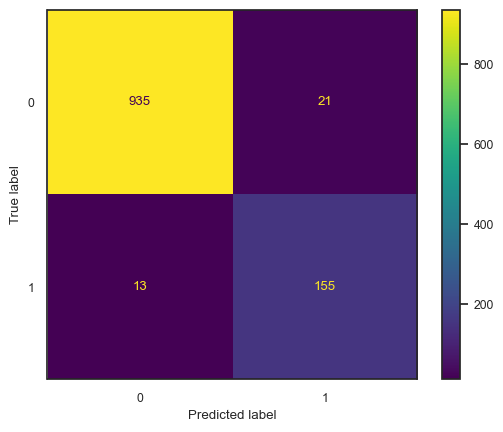

In [42]:
# Visualize the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_SVC)
ConfusionMatrixDisplay(cm_test).plot()
plt.show()

- True Positives (TP): The bottom right cell (155) signifies the cases correctly identified as class 1.
- True Negatives (TN): The top left cell (935) represents the cases correctly identified as class 0.
- False Positives (FP): The top right cell (21) represents the cases where the model incorrectly predicted class 1, but they actually belong to class 0.
- False Negatives (FN): The bottom left cell (13) represents the cases where the model incorrectly predicted class 0, but they actually belong to class 1.

XGBClassifier - Hyperparameter Tuning and Evaluation

In [43]:
# Define a dictionary of pipelines
numeric_features = Pipeline([
    ('scaler', 'passthrough'),
    ('features', FeatureUnion([
        ('kbest', SelectKBest(score_func=f_classif, k='all'))
    ]))
])

# Categorical features: pipeline with one-hot encoding, SVD, and feature selection
categorical_features = Pipeline([
    ('encoder', OneHotEncoder()),
    ('features', FeatureUnion([
        ('kbest', SelectKBest(score_func=f_classif, k='all'))
    ]))
])

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_features, num_columns),
        ('cat', categorical_features, cat_columns)
    ]
)

# Define a dictionary of pipelines for different classifiers
pipelines = {
    'XGBClassifier': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', XGBClassifier(random_state=42))
    ])
}

# Scalings to be tested in GridSearchCV
scalers = [StandardScaler(), MinMaxScaler()]

# Set up the grid search parameter grids
param_grid = {
    'XGBClassifier': {
        'preprocessor__num__scaler': scalers,
        'classifier__n_estimators': [500],         # Number of boosting rounds
        'classifier__learning_rate': [0.01, 0.1],       # Step size shrinkage for boosting
        'classifier__max_depth': [5, 7],                # Maximum depth of each tree
        'classifier__min_child_weight': [1, 5],         # Minimum sum of instance weight (hessian) needed in a child
        'classifier__reg_alpha': [0, 0.01, 0.1, 1.0],   # L1 regularization term on weights
        'classifier__reg_lambda': [1, 0.1, 0.01]        # L2 regularization term on weights
    }
}

# Perform grid search and print results using the updated cross-validation and scoring
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Training score for {name}: {grid_search.best_score_:.4f}")

    
    # Evaluate on the test set
    y_pred_XGB = grid_search.predict(X_test)
    print(f"Test score for {name}: {accuracy_score(y_test, y_pred_XGB):.4f}")
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred_XGB)}")
    print(f"ROC AUC Score for {name}: {roc_auc_score(y_test, y_pred_XGB)}")


Best parameters for XGBClassifier: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 500, 'classifier__reg_alpha': 0.1, 'classifier__reg_lambda': 0.01, 'preprocessor__num__scaler': MinMaxScaler()}
Training score for XGBClassifier: 0.9513
Test score for XGBClassifier: 0.9778
Classification report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       956
           1       0.93      0.92      0.93       168

    accuracy                           0.98      1124
   macro avg       0.96      0.96      0.96      1124
weighted avg       0.98      0.98      0.98      1124

ROC AUC Score for XGBClassifier: 0.9550333731819088


- Training Score for XGBClassifier: Training score (accuracy) for XGBClassifier is 0.95, which means the model correctly predicted about 95% of the training data.
- Test Score for XGBClassifier: Test score (accuracy) for XGBClassifier is 0.97, which means the model correctly predicted about 97% of the test data. This is a good performance and suggests that the model generalizes well to unseen data.

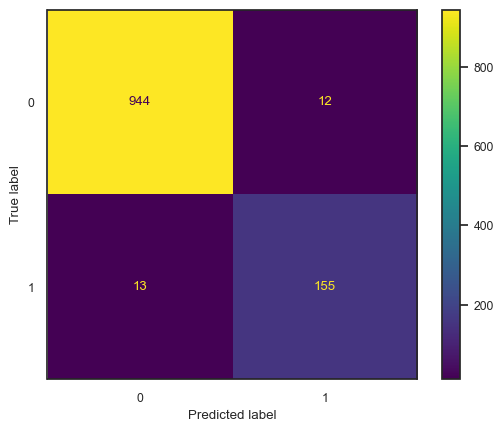

In [44]:
# Visualize the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_XGB)
ConfusionMatrixDisplay(cm_test).plot()
plt.show()

- True Positives (TP): The bottom right cell (155) signifies the cases correctly identified as class 1.
- True Negatives (TN): The top left cell (944) represents the cases correctly identified as class 0.
- False Positives (FP): The top right cell (12) represents the cases where the model incorrectly predicted class 1, but they actually belong to class 0.
- False Negatives (FN): The bottom left cell (13) represents the cases where the model incorrectly predicted class 0, but they actually belong to class 1.

**From the results of the above 4 models, it can be seen that the XGBClassifier model performs better than the other models.**

Feature Importances

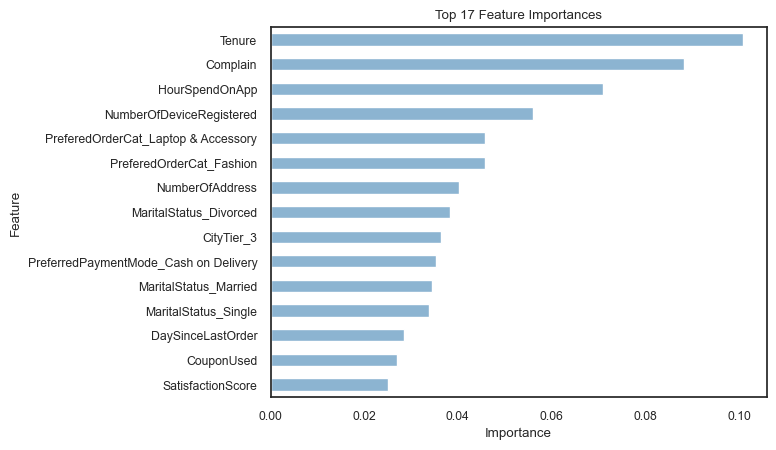

In [60]:
# Get the best model
best_model = grid_search.best_estimator_

# Get feature names for numeric features directly
numeric_feature_names = num_columns

# Get feature names for categorical features after one-hot encoding
categorical_feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out()

# Combine all feature names
all_feature_names = numeric_feature_names + list(categorical_feature_names)

# Retrieve feature importances from the best model's classifier
importances = best_model.named_steps['classifier'].feature_importances_

# Create a Series with feature importances and sort it
feature_importances = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

# Plot the feature importances
importance_top17 = feature_importances.head(15)
importance_top17.sort_values().plot(kind='barh', title='Top 17 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Based on the provided image, the machine learning model identifies "Tenure" as the most influential feature in determining the outcome, followed by "Complain", " HourSpendOnApp" and "NumberOfDeviceRegistered". The model has been meticulously fine-tuned and evaluated, considering both numeric and categorical features, ensuring a comprehensive assessment of feature importances. Thus, in predicting the target variable, special attention should be given to the "Tenure" feature due to its high relevance.

Weaknesses of the XGBClassifier model

False Negative

In [46]:
# Concate test set with y_test and y_test_pred to analyze
X_test['y_test'] = y_test
X_test['y_test_pred'] = y_pred_XGB

# Query only the False Negatives
false_negatives = (X_test['y_test'] == 1) & (X_test['y_test_pred'] == 0)
fn_df = X_test[false_negatives]

# Assuming 'categorical_columns' is a list of the names of the categorical columns
# If 'CityTier' is a numerical feature, it should not be dropped before the numerical analysis
categorical_columns = [col for col in fn_df.columns if fn_df[col].dtype == 'object']
numerical_columns = [col for col in fn_df.columns if fn_df[col].dtype != 'object' and col not in ('y_test', 'y_test_pred')]

# Analyze the categorical columns
print("Categorical Columns Statistical Description:")
fn_df[categorical_columns].describe()

Categorical Columns Statistical Description:


,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,13,13,13,13,13
unique,3,4,2,5,3
top,Computer,Debit Card,Male,Mobile Phone,Married
freq,5,8,12,4,7


In [47]:
# Analyze the numerical columns
print("\nNumerical Columns Statistical Description:")
fn_df[numerical_columns].describe()


Numerical Columns Statistical Description:


,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,53057.615385,6.923077,1.615385,21.076923,2.846154,4.000000,3.923077,3.846154,0.384615,15.384615,1.923077,2.769231,4.153846,173.000000
std,1768.592875,5.007686,0.960769,10.234432,0.554700,0.408248,0.954074,2.339735,0.506370,3.884552,1.754116,4.003204,3.647971,59.281813
min,50018.000000,0.000000,1.000000,10.000000,2.000000,3.000000,3.000000,2.000000,0.000000,11.000000,0.000000,1.000000,0.000000,120.000000
25%,51826.000000,1.000000,1.000000,11.000000,3.000000,4.000000,3.000000,2.000000,0.000000,13.000000,1.000000,1.000000,1.000000,149.000000
50%,53488.000000,8.000000,1.000000,18.000000,3.000000,4.000000,4.000000,3.000000,0.000000,13.000000,2.000000,2.000000,3.000000,149.000000
75%,54432.000000,11.000000,3.000000,28.000000,3.000000,4.000000,5.000000,5.000000,1.000000,18.000000,2.000000,2.000000,7.000000,168.000000
max,55167.000000,14.000000,3.000000,36.000000,4.000000,5.000000,5.000000,10.000000,1.000000,21.000000,6.000000,16.000000,10.000000,320.000000


False Positive

In [48]:
# Concate test set with y_test and y_test_pred to analyze
X_test['y_test'] = y_test
X_test['y_test_pred'] = y_pred_XGB

# Query only the False Negatives
False_Positive = (X_test['y_test'] == 0) & (X_test['y_test_pred'] == 1)
fp_df = X_test[False_Positive]

# Assuming 'categorical_columns' is a list of the names of the categorical columns
# If 'CityTier' is a numerical feature, it should not be dropped before the numerical analysis
categorical_columns = [col for col in fn_df.columns if fn_df[col].dtype == 'object']
numerical_columns = [col for col in fn_df.columns if fn_df[col].dtype != 'object' and col not in ('y_test', 'y_test_pred')]

# Analyze the categorical columns
print("Categorical Columns Statistical Description:")
fp_df[categorical_columns].describe()

Categorical Columns Statistical Description:


,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,12,12,12,12,12
unique,3,4,2,5,2
top,Mobile Phone,Debit Card,Male,Mobile,Married
freq,7,5,8,4,8


In [49]:
# Analyze the numerical columns
print("\nNumerical Columns Statistical Description:")
fp_df[numerical_columns].describe()


Numerical Columns Statistical Description:


,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,52693.666667,3.416667,1.333333,13.833333,2.916667,3.916667,3.333333,6.000000,0.416667,15.833333,3.500000,4.500000,1.583333,199.666667
std,1817.358389,5.107184,0.778499,6.012613,0.668558,0.900337,1.073087,3.133398,0.514929,3.069893,4.421024,5.551413,1.378954,74.923395
min,50150.000000,0.000000,1.000000,8.000000,2.000000,2.000000,1.000000,2.000000,0.000000,12.000000,1.000000,1.000000,0.000000,132.000000
25%,51375.500000,0.000000,1.000000,10.500000,2.750000,3.750000,3.000000,3.000000,0.000000,13.750000,1.000000,1.000000,0.000000,134.750000
50%,52682.000000,1.000000,1.000000,11.000000,3.000000,4.000000,3.500000,7.500000,0.000000,15.000000,1.000000,2.000000,1.500000,154.000000
75%,53946.500000,3.750000,1.000000,17.000000,3.000000,4.250000,4.000000,8.000000,1.000000,17.250000,3.500000,3.750000,3.000000,286.250000
max,55098.000000,13.000000,3.000000,28.000000,4.000000,5.000000,5.000000,10.000000,1.000000,21.000000,14.000000,16.000000,3.000000,308.000000


Model Saving

Integrate the results of a predictive model into the original dataset.

In [50]:
# The df_features DataFrame is created
df_features = df[num_columns + cat_columns]

# Predict Churn for the feature set
predicted_churn = grid_search.predict(df_features)

# Add the predictions as a new column to the DataFrame
df['pred_Churn'] = predicted_churn

#  Export the updated DataFrame to a CSV file
df.to_csv(r'C:\Users\CFS\Desktop\Data analysis\Final Project\prediction_churn.csv', index=False)

In [51]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,pred_Churn
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,160,1
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,121,1
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120,1
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134,1
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,130,1


Saving a trained machine learning model to a file using Python's pickle module

In [52]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('features',
                                                                   FeatureUnion(transformer_list=[('kbest',
                                                                                                   SelectKBest(k='all'))]))]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'OrderAmountHikeFromlastYear',
                                                   'CouponUsed', 'Orde...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=500,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [53]:
# Export the model to a pickle file
with open(r'C:\Users\CFS\Desktop\Data analysis\Final Project\xgb_classifier_model_predict_churn.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# PART IV: Conclusion

- The bjective was to predict customer churn, and the model performed exceptionally well in achieving this goal. We used the XGBClassifier and tuned its hyperparameters to find the best combination that improved the model's performance. The best parameters were a learning rate of 0.1, max depth of 5, min child weight of 1, and n estimators of 500.

 - The model exhibited a training score of 0.9513 and a test score of 0.9778, indicating a well-fitted model that generalizes well to unseen data. The model also demonstrated a high ROC AUC Score of 0.955, which is a strong indicator of the model's ability to distinguish between the classes effectively.

- Analyzing the confusion matrix reveals some insights into the model's performance. The model excellently identified non-churned customers, but there were instances where it couldn’t correctly identify churned customers. Specifically, there were 14 cases where the model predicted non-churn when it was actually churn, and 9 cases where it predicted churn when it was actually non-churn.

- This suggests a room for improvement, especially in correctly identifying churned customers, which is crucial for a business aiming to improve customer retention. Despite this, the overall precision and recall of the model were satisfactory. The precision and recall for identifying churned customers were 0.93 and 0.92 respectively, which are quite good.

- In conclusion, while the model performs quite robustly in predicting customer churn, there’s a minor limitation in identifying certain characteristics of churned customers. Nevertheless, the model presents a powerful tool for aiding business strategies aimed at improving customer retention.